<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li></ul></div>

# Восстановление золота из руды

Нужно подготовить прототип модели машинного обучения компании, разрабатывающей решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Следует использовать данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, используются библиотеки *pandas*, *matplotlib* и *sklearn.* 

## Подготовка данных

In [3]:
# Импорт библиотеки pandas
import pandas as pd
# Импорт библиотеки numpy
import numpy as np
# Импорт библиотеки matplotlib
import matplotlib.pyplot as plt
# Импорт библиотеки math
import math
# Импорт библиотеки seaborn
import seaborn as sns
# Импорт библиотеки sklearn и необходимых компонентов
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler 
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error 
from scipy import stats as st
from scipy.stats import norm
# Удаление ложных предупреждений
pd.options.mode.chained_assignment = None  # default='warn'
# Сброс ограничений на число столбцов
pd.set_option('display.max_columns', None)

<font color='DarkBlue'> 
📌 Импортированы все библиотеки, используемые далее в проекте, и скорректированы настройки <br>
</font> 

### Анализ обучающей выборки

In [4]:
# Загрузка таблицы в память переменной df_train типа dataframe
df_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
# Разделители для удобства отображения информации указаны в виде отдельных пунктов 'print("\033[1m\033[43m {}".format('----- Text -----'),"\033[0m")'
print('\033[1m\033[43m {}'.format('----- Просмотр общей информации о dataframe -----'),'\033[0m')
df_train.info()
print('\033[1m\033[43m {}'.format('----- Информация о заголовках полей dataframe -----'),'\033[0m')
print(df_train.columns)
print('\033[1m\033[43m {}'.format('----- Информация о типах полей dataframe -----'),'\033[0m')
print(df_train.dtypes)
print('\033[1m\033[43m {}'.format('----- Отображение на экране в читаемом виде первых записей таблицы dataframe для визуального анализа -----'),'\033[0m')
display(df_train.head())
print('Количество явных дубликатов', df_train.duplicated().sum())

 ----- Просмотр общей информации о dataframe ----- 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol   

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

Количество явных дубликатов 0


<font color='DarkBlue'> 
📌 В ходе первичного анализа данных сформированы следующие выводы: <br>
    
1. Отсутствует необходимость в редактировании заголовков, названия представлены в условно общепринятом формате 'змеиный_регистр'
2. Отсутствуют явные дубликаты, на данном этапе удаление строк не требуется
3. Обнаружены пропуски во многих столбцах. Желательно рассмотреть закономерность их проявления и заполнить подходящими для соответствующих записей значениями, оставить текущие или, в противном случае, удалить
4. Тип данных некоторых числовых полей желательно преобразовать для уменьшения требуемого объема памяти хранения данных, также необходимо конвертировать время в соответствующий тип. При использовании датасета в качестве выборки для машинного обучения этот столбец можно удалить, но в нем содержатся информативные данные, по которым можно упорядочить записи или провести дальнейший анализ
5. В данных таблицы некорректные значения не наблюдаются. Необходимо детально рассмотреть параметры каждого столбца
</font> 

In [5]:
df_train['date'] = pd.to_datetime(df_train['date'],format='%Y-%m-%d %H:%M:%S')

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,14148.000000,14148.000000,13938.000000,14149.000000,14149.000000,14149.000000,14049.000000,14144.000000,14149.000000,14129.000000,14117.000000,14149.000000,14049.000000,14149.000000,14063.000000,13863.000000,14149.000000,14148.000000,14134.000000,14103.000000,14149.000000,14145.000000,14148.000000,14145.000000,14148.000000,14147.000000,14148.000000,14146.000000,14148.000000,1.414800e+04,14148.000000,14148.000000,14149.000000,14149.000000,14049.000000,14141.000000,14005.000000,14071.000000,14149.000000,14120.000000,14141.000000,14113.000000,13721.000000,14149.000000,14149.000000,14127.000000,14149.000000,14149.000000,14148.000000,14149.000000,14149.000000,14149.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14149.000000,14149.000000,13713.000000,14149.000000,14149.000000,14149.000000,14147.000000,14139.000000,12544.000000,14149.000000,13932.000000,14148.000000,14128.000000,14148.000000,14145.000000,14148.000000,14148.000000,14148.000000,14143.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148

,date
count,14149
mean,2017-04-27 18:15:12.814828288
min,2016-01-15 00:00:00
25%,2016-07-12 12:59:59
50%,2017-04-24 15:59:59
75%,2018-02-26 00:59:59
max,2018-08-18 10:59:59


-----
Все значения уникальны
-----
date


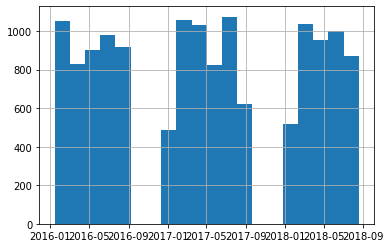

final.output.concentrate_ag


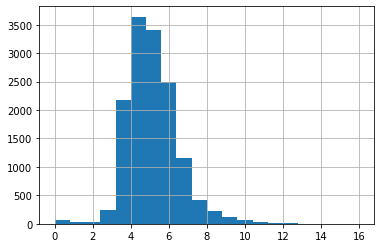

final.output.concentrate_pb


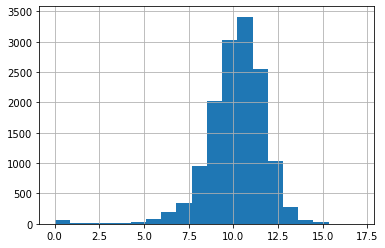

final.output.concentrate_sol


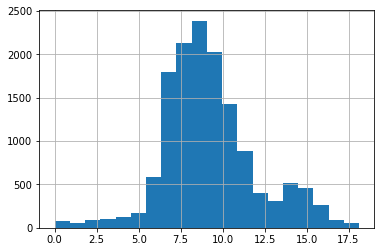

final.output.concentrate_au


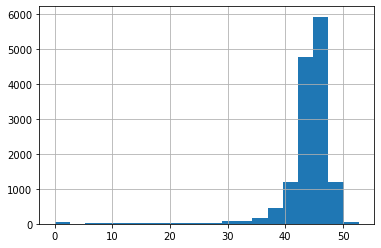

final.output.recovery


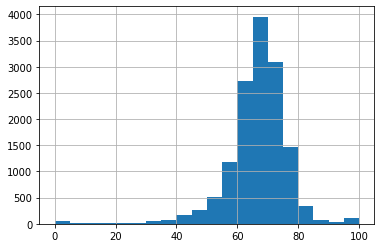

final.output.tail_ag


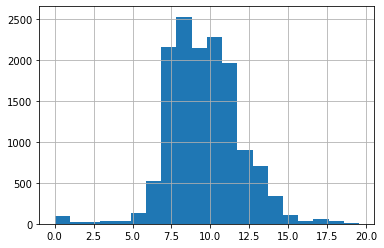

final.output.tail_pb


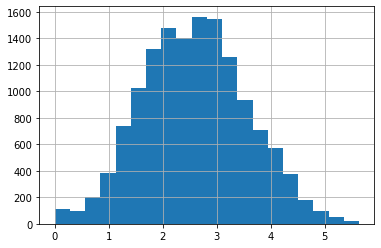

final.output.tail_sol


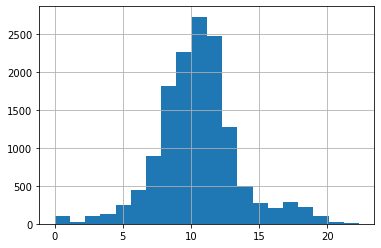

final.output.tail_au


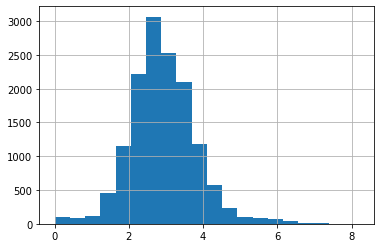

primary_cleaner.input.sulfate


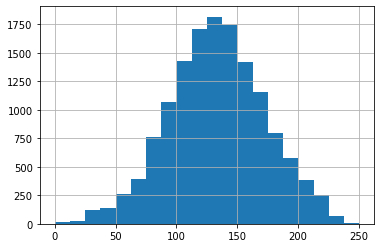

primary_cleaner.input.depressant


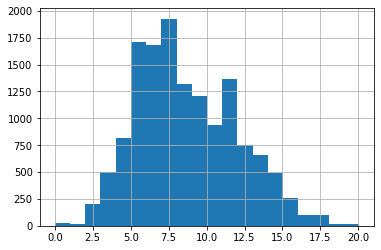

primary_cleaner.input.feed_size


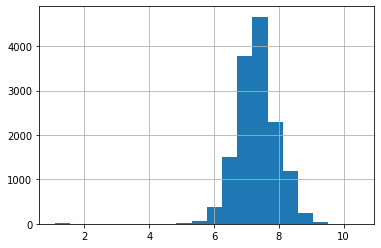

primary_cleaner.input.xanthate


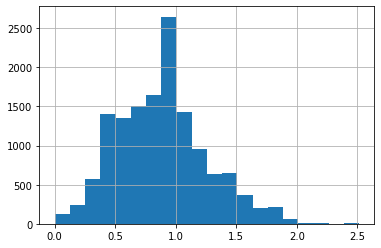

primary_cleaner.output.concentrate_ag


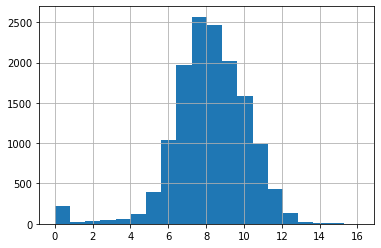

primary_cleaner.output.concentrate_pb


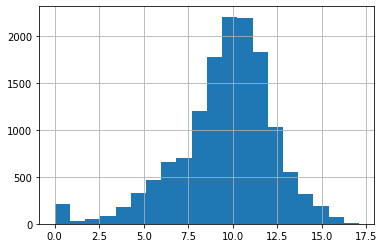

primary_cleaner.output.concentrate_sol


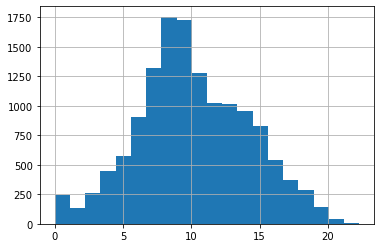

primary_cleaner.output.concentrate_au


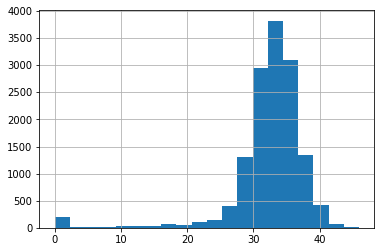

primary_cleaner.output.tail_ag


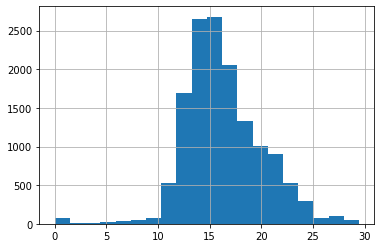

primary_cleaner.output.tail_pb


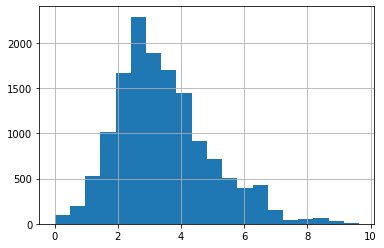

primary_cleaner.output.tail_sol


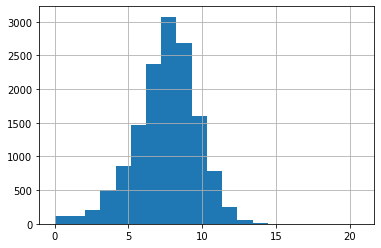

primary_cleaner.output.tail_au


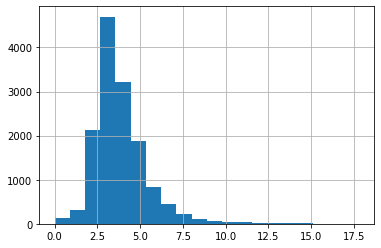

primary_cleaner.state.floatbank8_a_air


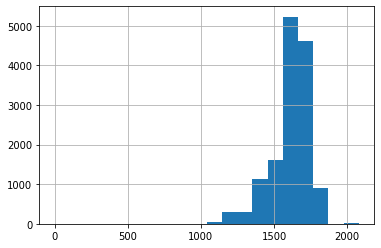

primary_cleaner.state.floatbank8_a_level


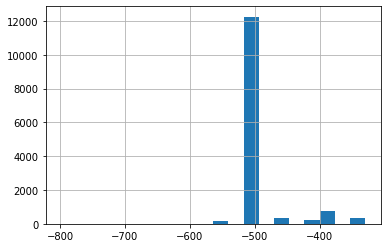

primary_cleaner.state.floatbank8_b_air


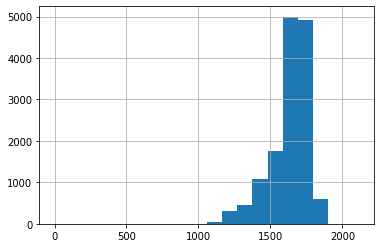

primary_cleaner.state.floatbank8_b_level


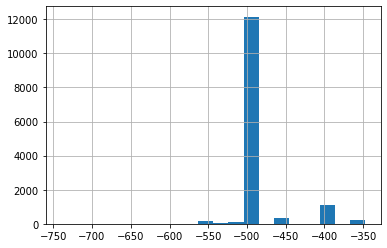

primary_cleaner.state.floatbank8_c_air


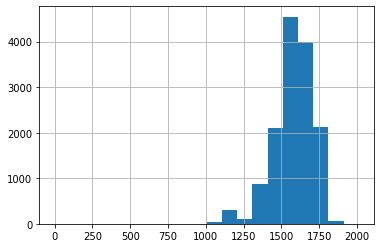

primary_cleaner.state.floatbank8_c_level


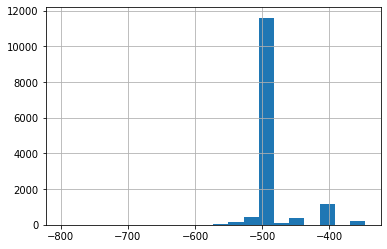

primary_cleaner.state.floatbank8_d_air


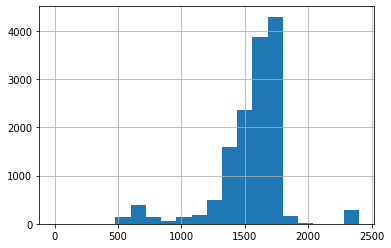

primary_cleaner.state.floatbank8_d_level


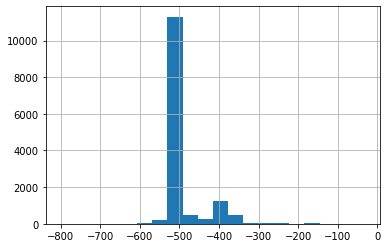

rougher.calculation.sulfate_to_au_concentrate


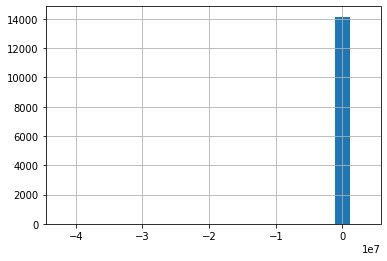

rougher.calculation.floatbank10_sulfate_to_au_feed


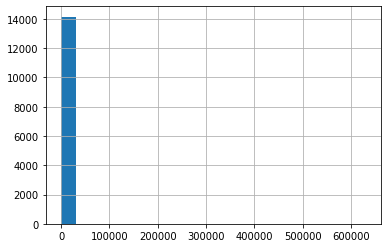

rougher.calculation.floatbank11_sulfate_to_au_feed


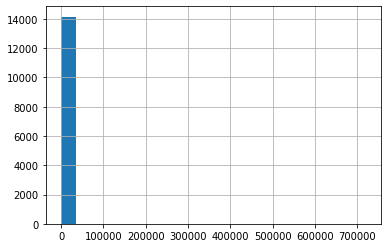

rougher.calculation.au_pb_ratio


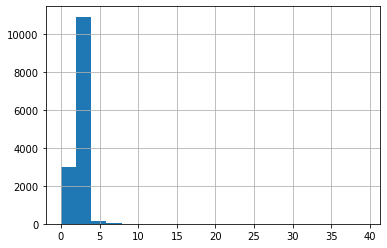

rougher.input.feed_ag


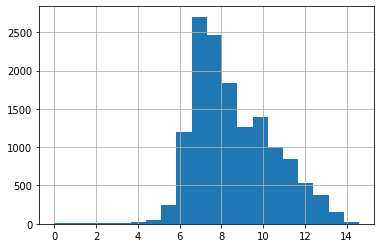

rougher.input.feed_pb


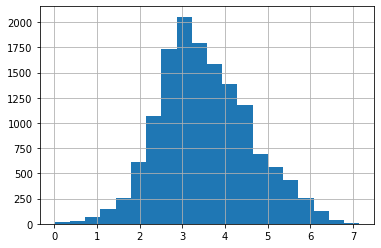

rougher.input.feed_rate


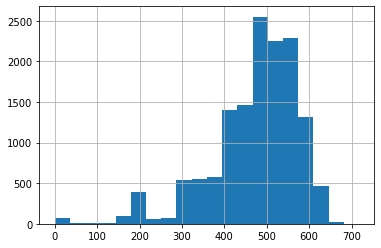

rougher.input.feed_size


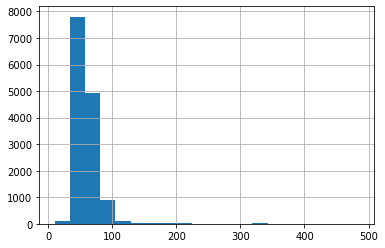

rougher.input.feed_sol


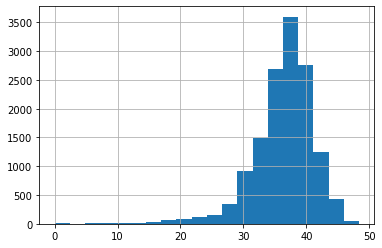

rougher.input.feed_au


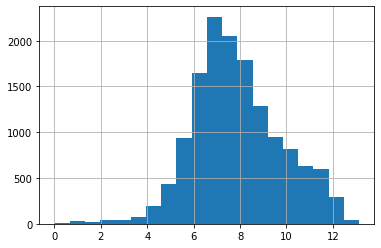

rougher.input.floatbank10_sulfate


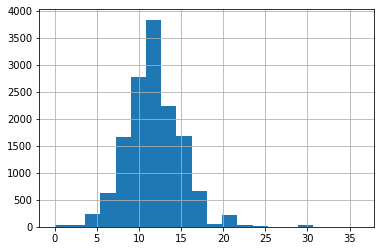

rougher.input.floatbank10_xanthate


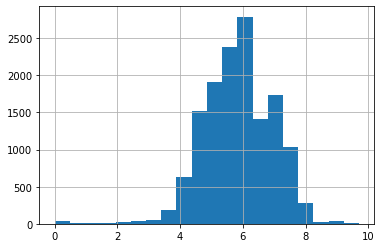

rougher.input.floatbank11_sulfate


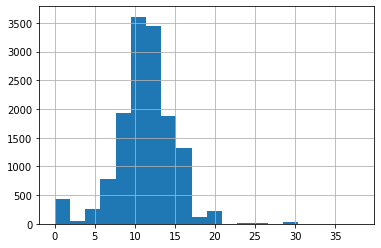

rougher.input.floatbank11_xanthate


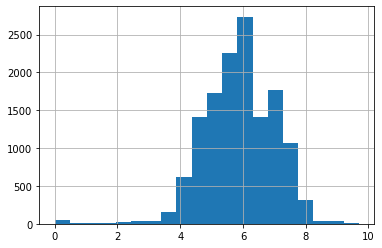

rougher.output.concentrate_ag


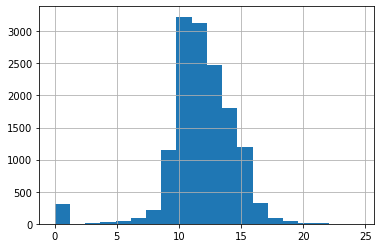

rougher.output.concentrate_pb


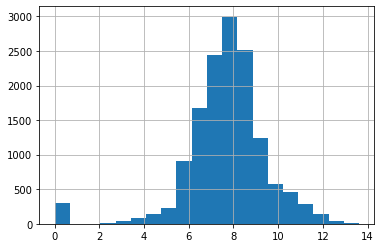

rougher.output.concentrate_sol


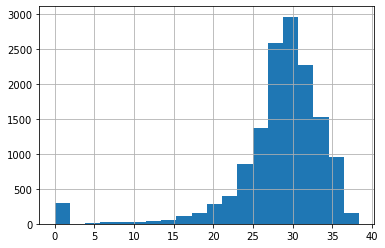

rougher.output.concentrate_au


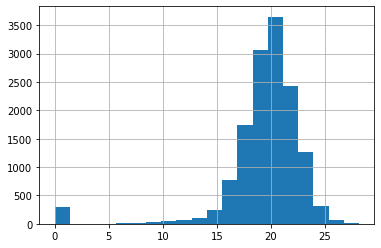

rougher.output.recovery


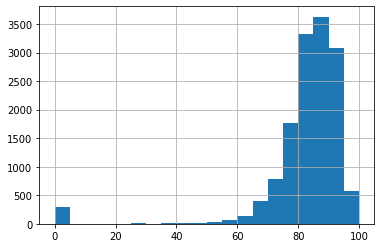

rougher.output.tail_ag


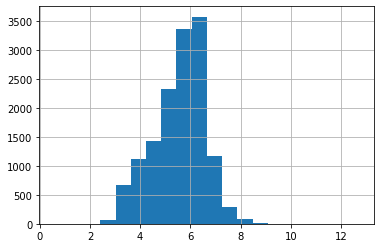

rougher.output.tail_pb


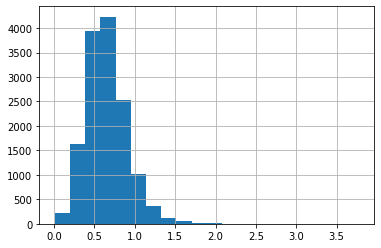

rougher.output.tail_sol


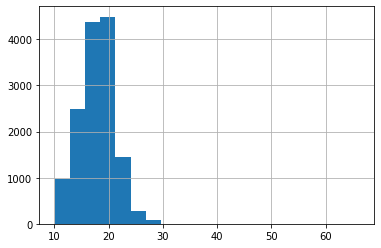

rougher.output.tail_au


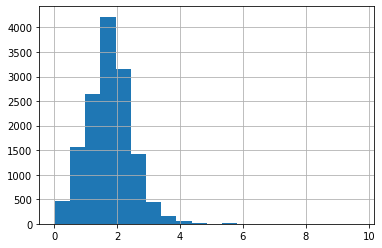

rougher.state.floatbank10_a_air


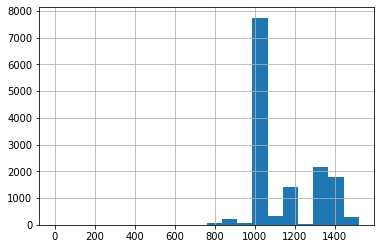

rougher.state.floatbank10_a_level


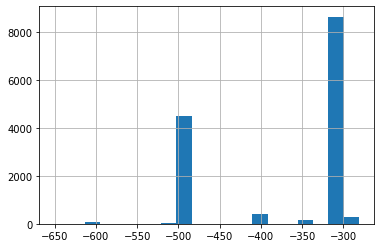

rougher.state.floatbank10_b_air


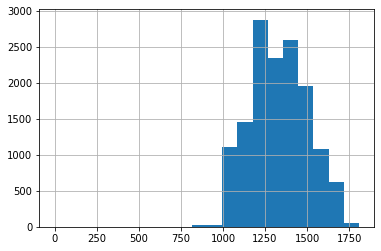

rougher.state.floatbank10_b_level


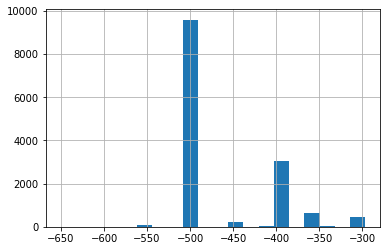

rougher.state.floatbank10_c_air


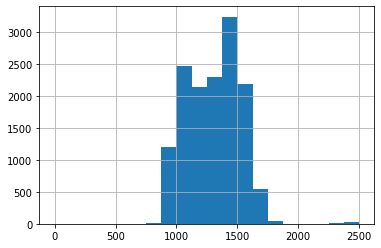

rougher.state.floatbank10_c_level


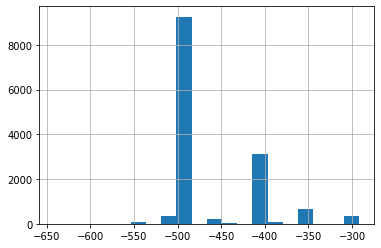

rougher.state.floatbank10_d_air


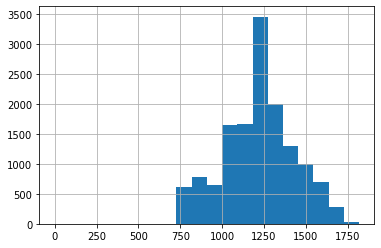

rougher.state.floatbank10_d_level


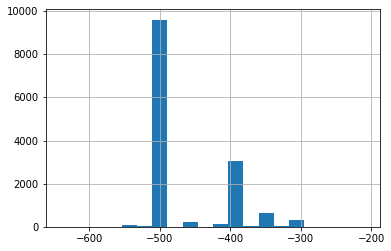

rougher.state.floatbank10_e_air


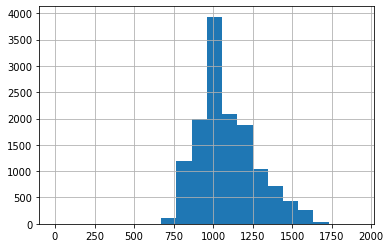

rougher.state.floatbank10_e_level


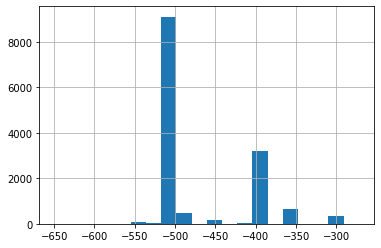

rougher.state.floatbank10_f_air


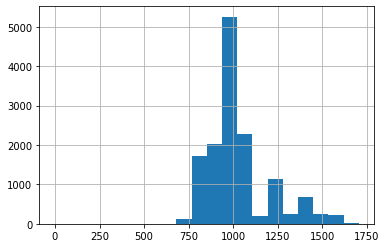

rougher.state.floatbank10_f_level


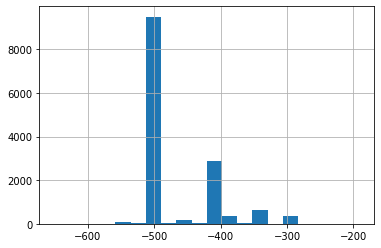

secondary_cleaner.output.tail_ag


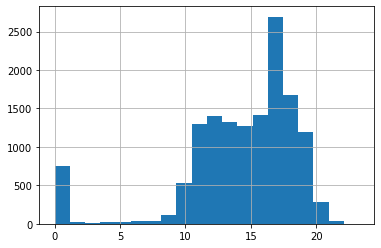

secondary_cleaner.output.tail_pb


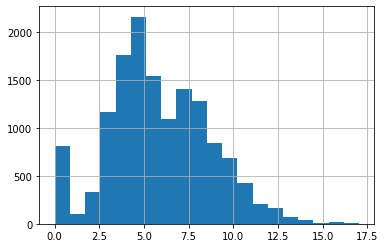

secondary_cleaner.output.tail_sol


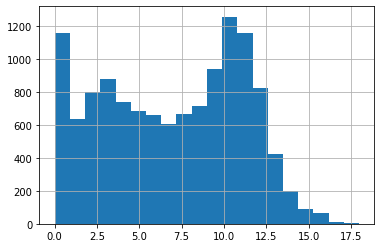

secondary_cleaner.output.tail_au


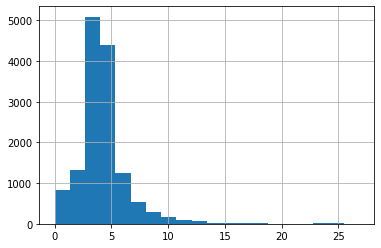

secondary_cleaner.state.floatbank2_a_air


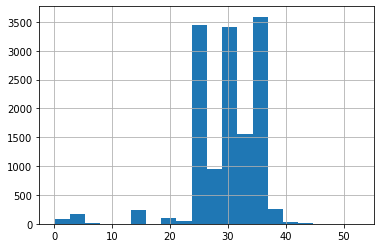

secondary_cleaner.state.floatbank2_a_level


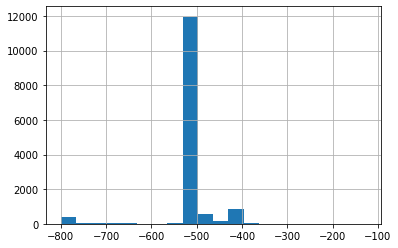

secondary_cleaner.state.floatbank2_b_air


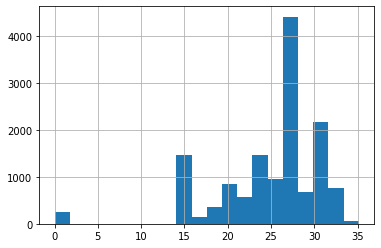

secondary_cleaner.state.floatbank2_b_level


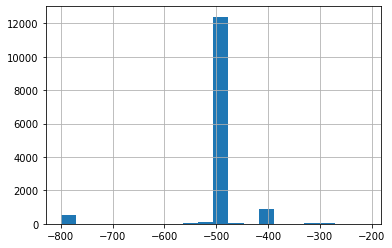

secondary_cleaner.state.floatbank3_a_air


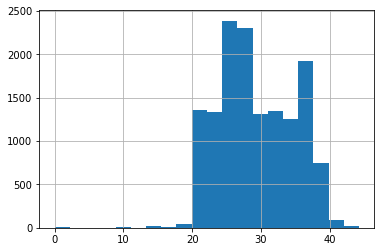

secondary_cleaner.state.floatbank3_a_level


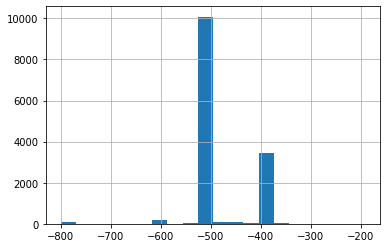

secondary_cleaner.state.floatbank3_b_air


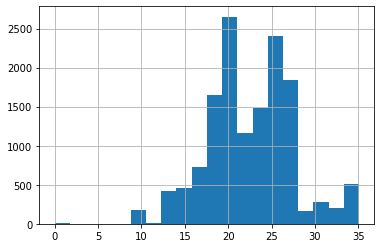

secondary_cleaner.state.floatbank3_b_level


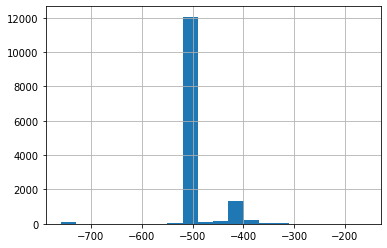

secondary_cleaner.state.floatbank4_a_air


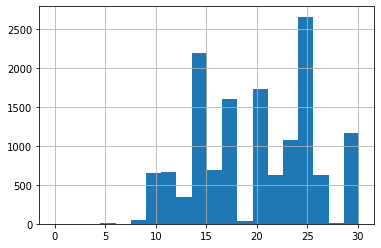

secondary_cleaner.state.floatbank4_a_level


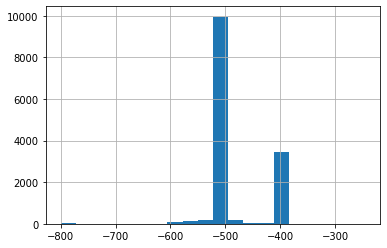

secondary_cleaner.state.floatbank4_b_air


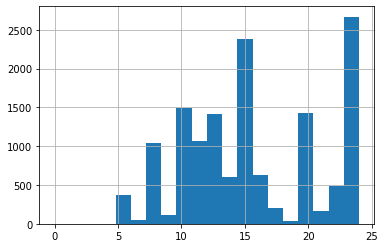

secondary_cleaner.state.floatbank4_b_level


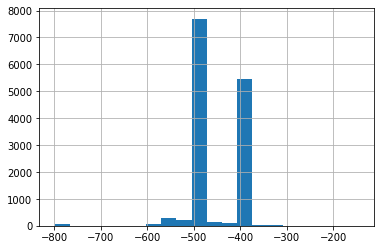

secondary_cleaner.state.floatbank5_a_air


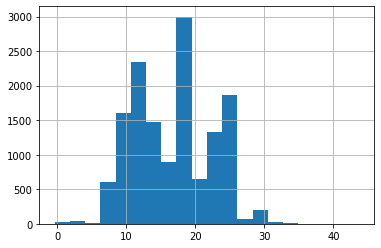

secondary_cleaner.state.floatbank5_a_level


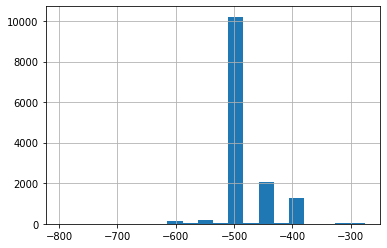

secondary_cleaner.state.floatbank5_b_air


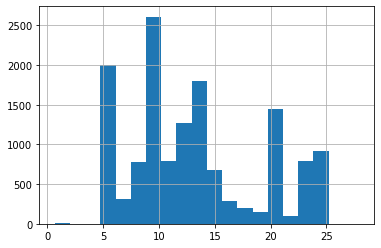

secondary_cleaner.state.floatbank5_b_level


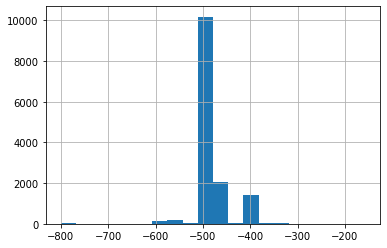

secondary_cleaner.state.floatbank6_a_air


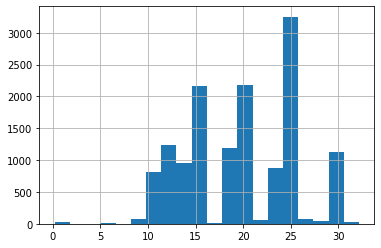

secondary_cleaner.state.floatbank6_a_level


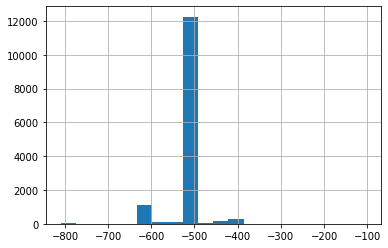

In [6]:
display(df_train.describe())
try:
    display(df_train.describe(include = ['object','bool','datetime'], datetime_is_numeric=True))
    for i in df_train.select_dtypes(include=['object','bool','datetime']):
        print('-----')
        if df_train[i].count() != len(df_train[i].unique()):
            print(df_train[i].value_counts())
        else:
            print('Все значения уникальны')
except:
    print('Все данные представлены в числовом формате')
print('-----')
for i in df_train:     
    if not ((df_train[i].dtype == 'object') & (len(df_train[i].unique()) > 20)):
        print(i)
        if (len(df_train[i].unique()) < 20):
            df_train[i].hist(bins=len(df_train[i].unique()))
            plt.show()  
        else:        
            df_train[i].hist(bins=20)
            plt.show()

<font color='DarkBlue'> 
📌 Предоставлено большое количество исходных данных. Данные отсортированы в порядке возрастания времени. В некоторых полях присутствует большее количество пропусков, чем в остальных. Есть пробелы во временном периоде, связанные с отсутствием записей по причине выделения из исходных данных обучающей выборки <br>
📌 Можно рассмотреть случайно выбранную запись с отсутствующим значением поля и определить, есть ли корреляция с другими признаками, возможно некоторые записи неинформативны. Также можно рассмотреть количество объектов с пропусками в каждом поле <br>  
</font> 

In [7]:
df_train[df_train['final.output.concentrate_ag'].isna()]

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
2869,2016-06-08 17:59:59,NaN,NaN,10.188231,29.020814,63.725335,7.387115,2.072266,16.982505,2.908215,83.915221,8.459214,6.87,0.696461,6.742431,7.619226,4.591482,39.917946,12.30259,2.132427,18.405206,4.525795,1198.860284,-549.665908,1199.910331,-549.585203,1199.488085,-549.427043,1198.993134,-549.553514,40158.737221,4914.601468,4919.216761,2.763166,5.557782,2.467129,347.909369,49.850703,45.955078,6.817088,12.994918,4.296929,12.994157,4.302651,8.403598,3.777559,28.439701,14.899572,84.616723,5.269274,0.524612,23.333899,1.711177,1002.26488,-501.196451,950.720196,-548.465988,949.742752,-546.833295,951.438516,-548.66481,750.423479,-548.398862,750.052691,-550.544264,10.125163,4.522465,16.005672,4.986575,20.100027,-498.644669,15.087279,-499.810926,21.065249,-499.683197,19.015919,-499.398637,8.985634,-548.815307,7.011665,-537.231749,8.031238,-550.028193,5.984399,-549.63625,18.01224,-551.325271


In [8]:
df = pd.DataFrame()
for i in df_train.columns:
    if (len(df_train[df_train[i].isna()]) > 0):
        df = pd.concat([df_train[df_train[i].isna()], df])
df = df.drop_duplicates()
display(df)     

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
114,2016-01-21 10:00:00,5.782224,10.969985,9.301260,43.181003,74.257359,11.959760,2.064173,15.139256,3.091437,NaN,NaN,7.2500,NaN,11.345656,9.424562,20.275368,31.333106,17.514891,3.971093,7.845526,3.162975,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.367651,12.028591,4.203939,NaN,NaN,41.782570,9.953462,NaN,NaN,NaN,NaN,13.678706,7.790201,28.779023,19.650397,86.217222,6.055658,0.862177,19.770304,2.435464,NaN,NaN,NaN,NaN,NaN,NaN,1393.735867,-501.357678,1196.516363,-505.322143,1097.010735,-499.416892,16.134409,5.427901,12.116604,3.259027,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8884,2017-07-23 23:59:59,0.000000,0.000000,0.000000,0.000000,0.000000,3.735853,1.375197,4.186355,2.076641,34.339088,1.425304,7.3000,0.073258,5.933491,NaN,NaN,33.079340,18.273365,2.826770,NaN,5.993227,1637.458546,-500.852344,1900.825938,-525.307129,956.232764,-471.134030,1521.427975,-504.389254,44953.836178,5448.105077,5444.414594,2.108807,7.083060,2.897126,400.519737,49.212570,29.299571,6.109481,12.725522,3.630163,12.715368,4.151391,4.758325,4.427165,20.53

<font color='DarkBlue'> 
📌 Корреляция с другими признаками отсутствует, следовательно пропуски независимы и спонтанны, не принадлежат только определеннным записям. Вероятнее всего их присутствие связано с определением ручных ошибок <br>
📌 Так как рассматриваемый процесс непрерывный и последовательный, все параметры изменяются относительно предыдущих записей в датафрейме. Следовательно, все неопределенные значения NaN лучше заполнить предыдущими, чем усредненными <br>
📌 Почти на всех гистограммах выделяются нулевые данные. Это аномалии, значения которых рекомендуется изменить на NaN, затем привести в соответствие с предыдущими по времени значениями. Другие аномальные значения скорее всего действительные. Исходных данных недостаточно, чтобы это определить, поэтому желательно их оставить <br>    
</font> 

In [9]:
df_train = df_train.replace(0, np.nan)
df_train = df_train.fillna(method='ffill')

<font color='DarkBlue'> 
📌 Рекомендуется преобразовать типы данных полей для оптимизации памяти <br>  
</font> 

In [10]:
df_train[df_train.select_dtypes(include=['int']).columns] = df_train.select_dtypes(include=['int']).apply(pd.to_numeric,downcast='unsigned')
df_train[df_train.select_dtypes(include=['float']).columns] = df_train.select_dtypes(include=['float']).apply(pd.to_numeric,downcast='float')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                14149 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         14149 non-null  float32       
 2   final.output.concentrate_pb                         14149 non-null  float32       
 3   final.output.concentrate_sol                        14149 non-null  float32       
 4   final.output.concentrate_au                         14149 non-null  float32       
 5   final.output.recovery                               14149 non-null  float32       
 6   final.output.tail_ag                                14149 non-null  float32       
 7   final.output.tail_pb                                14149 non-null  float32       
 8   final.

<font color='DarkBlue'> 
📌 Необходимо проверить правильность расчета значения эффективности обогащения, вычислив её на обучающей выборке для признака 'rougher.output.recovery' <br> 
📌 Дополнительно, можно вывести распределение параметров, учавствующих в расчете <br>  
</font> 

,rougher.input.feed_au,rougher.output.concentrate_au,rougher.output.tail_au,rougher.output.recovery
count,14149.000000,14149.000000,14149.000000,14149.000000
mean,7.866577,19.798042,1.757473,84.530022
std,1.919506,2.572463,0.713187,8.005013
min,0.010000,0.010000,0.020676,2.520854
25%,6.596217,18.519251,1.310800,80.425583
50%,7.649138,19.969398,1.745513,85.517128
75%,9.066976,21.407001,2.186790,90.303200
max,13.126042,28.146837,9.688980,100.000000


rougher.input.feed_au


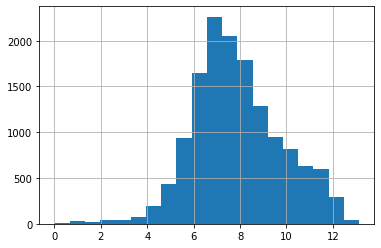

rougher.output.concentrate_au


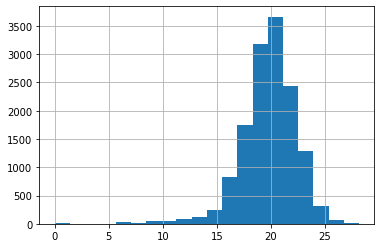

rougher.output.tail_au


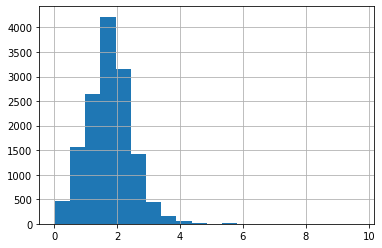

rougher.output.recovery


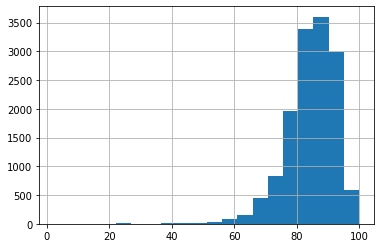

In [11]:
display(df_train[['rougher.input.feed_au', 'rougher.output.concentrate_au', 'rougher.output.tail_au', 'rougher.output.recovery']].describe())
for i in df_train[['rougher.input.feed_au', 'rougher.output.concentrate_au', 'rougher.output.tail_au', 'rougher.output.recovery']]:           
    print(i)
    df_train[i].hist(bins=20)
    plt.show()

<font color='DarkBlue'> 
📌 Наборы данных являются скошенными в разных направлениях. Вероятно наиболее влиятельным является признак 'rougher.output.concentrate_au' и, возможно, 'rougher.input.feed_au', так как график распределения итоговой величины похож на указанные <br> 
📌 С помощью формулы, представленной в исходной задаче, можно рассчитать искомое значение параметра для всех записей обучающей выборки, далее визуально сравнить их с существующими значениями <br>  
</font> 

In [12]:
df_train['rougher.output.recovery_calc'] = df_train['rougher.output.concentrate_au'] * (df_train['rougher.input.feed_au'] - df_train['rougher.output.tail_au']) / (df_train['rougher.input.feed_au'] * (df_train['rougher.output.concentrate_au'] - df_train['rougher.output.tail_au']))

In [13]:
df_train[['rougher.output.recovery', 'rougher.output.recovery_calc']].head()

,rougher.output.recovery,rougher.output.recovery_calc
0,87.107765,0.871078
1,86.843262,0.868433
2,86.842308,0.868423
3,87.226433,0.872264
4,86.688797,0.866888


<font color='DarkBlue'> 
📌 Значения параметров отличаются на множитель 100. Значения исходного поля указаны в процентном соотношении. Соответственно, необходимо привести их к подобному виду для сравнения, изменив данные рассчитанного поля <br> 
📌 Необходимо найти MAE между расчетами и существующим значением признака для их сравнения <br>  
</font> 

In [14]:
df_train['rougher.output.recovery_calc'] = df_train['rougher.output.recovery_calc'] * 100
print('MAE модели на валидационной выборке:', mean_absolute_error(df_train['rougher.output.recovery_calc'], df_train['rougher.output.recovery_calc']))

MAE модели на валидационной выборке: 0.0


<font color='DarkBlue'> 
📌 Так как MAE равно 0, значения рассматриваемых столбцов абсолютно идентичны. Значит расчет выполнен верно <br> 
📌 Нужно удалить созданный столбец с повторяющимися значениями <br>   
</font> 

In [15]:
df_train = df_train.drop('rougher.output.recovery_calc', axis=1)

### Анализ тестовой выборки

In [16]:
# Загрузка таблицы в память переменной df_test типа dataframe
df_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
# Разделители для удобства отображения информации указаны в виде отдельных пунктов 'print("\033[1m\033[43m {}".format('----- Text -----'),"\033[0m")'
print('\033[1m\033[43m {}'.format('----- Просмотр общей информации о dataframe -----'),'\033[0m')
df_test.info()
print('\033[1m\033[43m {}'.format('----- Информация о заголовках полей dataframe -----'),'\033[0m')
print(df_test.columns)
print('\033[1m\033[43m {}'.format('----- Информация о типах полей dataframe -----'),'\033[0m')
print(df_test.dtypes)
print('\033[1m\033[43m {}'.format('----- Отображение на экране в читаемом виде первых записей таблицы dataframe для визуального анализа -----'),'\033[0m')
display(df_test.head())
print('Количество явных дубликатов', df_test.duplicated().sum())

 ----- Просмотр общей информации о dataframe ----- 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,1399.001695,-499.485144,13.128569,5.636710,489.793655,62.710452,42.022440,12.084103,16.922877,6.153479,16.867518,6.150709,1001.849317,-350.301265,1249.738612,-399.107531,1249.750520,-399.396730,1198.287855,-399.488594,999.472250,-399.530962,949.566189,-398.180807,24.938200,-500.490963,14.947607,-500.013837,20.018166,-450.395995,13.987058,-449.831513,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,1399.508091,-500.416324,13.036280,5.526065,490.104534,61.961163,41.187903,11.918977,17.002532,5.999043,16.996063,6.002315,998.690785,-350.425704,1248.395457,-399.946025,1249.514451,-399.630810,1200.506459,-399.942434,1000.002114,-399.491528,950.200009,-405.787514,24.923466,-499.813963,14.930873,-500.764452,19.988503,-450.114024,14.092981,-450.059163,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,1399.497088,-499.715479,13.138412,5.426561,489.617969,66.903807,42.546294,12.091332,16.992520,5.850632,16.982096,5.853594,998.516720,-349.783538,1247.440748,-400.264330,1248.207204,-401.074405,1199.770026,-400.790582,999.925519,-399.236999,950.320481,-400.864340,24.908732,-500.304035,14.996511,-500.993821,20.039689,-450.263164,14.077881,-449.660997,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,1401.065165,-501.038738,12.400507,5.114758,476.618130,59.865919,41.060195,12.181597,16.532144,5.801935,16.515277,5.803657,1000.276604,-350.172597,1251.322675,-398.655289,1250.493702,-399.746728,1199.398691,-397.50

Количество явных дубликатов 0


<font color='DarkBlue'> 
📌 В ходе первичного анализа данных сформированы следующие выводы: <br>
    
1. Отсутствует необходимость в редактировании заголовков, названия представлены в условно общепринятом формате 'змеиный_регистр'
2. Отсутствуют явные дубликаты, на данном этапе удаление строк не требуется
3. Обнаружены пропуски во многих столбцах. Желательно рассмотреть закономерность их проявления и заполнить подходящими для соответствующих записей значениями, оставить текущие или, в противном случае, удалить
4. Тип данных некоторых числовых полей желательно преобразовать для уменьшения требуемого объема памяти хранения данных, также необходимо конвертировать время в соответствующий тип. При использовании датасета в качестве выборки для машинного обучения этот столбец можно удалить, но в нем содержатся информативные данные, по которым можно упорядочить записи или провести дальнейший анализ
5. В данных таблицы некорректные значения не наблюдаются. Необходимо детально рассмотреть параметры каждого столбца
</font>

In [17]:
df_test['date'] = pd.to_datetime(df_test['date'],format='%Y-%m-%d %H:%M:%S')

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5286.000000,5285.000000,5290.000000,5286.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5287.000000,5289.000000,5269.000000,5290.000000,5285.000000,5290.000000,5282.000000,5265.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5287.000000,5290.000000,5288.000000,5290.000000,5281.000000,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000
mean,174.839652,8.683596,7.266339,1.383803,1.539494e+03,-497.665883,1.545174e+03,-500.273098,1.527272e+03,-498.330680,1.544844e+03,-500.199527,9.371940,3.798082,489.800620,55.951097,37.716648,9.334682,13.855759,6.467745,13.922328,6.512103,1053.400166,-395.732530,1318.926879,-475.241428,1301.595477,-474.836671,1214.847960,-475.682272,1056.648995,-469.029688,997.949719,-470.482465,26.312630,-502.750897,21.949119,-501.987097,25.402926,-507.490314,2.098211e+01,-506.627916,1.632007e+01,-505.144570,1.373544e+01,-463.349858,12.804186,-501.329122,9.881145,-495.663398,17.304935,-501.793193
std,43.027080,3.072050,0.610219,0.643474,1.167979e+02,19.952431,1.222246e+02,32.968307,1.225380e+02,21.964876,1.247731e+02,31.045257,1.926264,0.954859,108.036326,19.081758,5.491415,1.619521,3.350852,1.065114,3.223769,0.886989,121.139309,91.085505,156.450366,45.649466,171.269667,45.859866,185.763319,47.844967,131.542839,59.325990,128.218869,60.759318,3.429852,28.756505,4.354961,34.582722,6.526457,47.620908,6.736179e+00,44.528673,3.493583e+00,31.427337,3.430484e+00,86.189107,3.026591,17.951495,2.868205,34.535007,4.536544,39.044215
min,2.566156,0.003839,5.650000,0.004984,5.445860e-32,-795.316337,6.647490e-32,-799.997015,4.033736e-32,-799.960571,4.039220e-32,-799.794250,0.568441,0.273677,0.002986,0.046369,1.393488,0.568632,0.001147,0.000568,0.000077,0.006985,-0.042069,-657.949759,-0.721806,-650.245277,-0.056636,-647.544439,-0.992219,-648.390665,-1.982295,-649.267537,-2.593390,-649.949283,0.20

,date
count,5290
mean,2017-05-06 07:04:00.587901952
min,2016-09-01 00:59:59
25%,2016-11-05 17:14:59
50%,2017-09-02 01:29:59
75%,2017-11-03 03:44:59
max,2017-12-31 23:59:59


-----
Все значения уникальны
-----
date


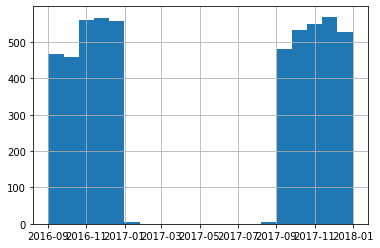

primary_cleaner.input.sulfate


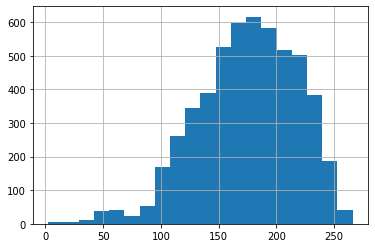

primary_cleaner.input.depressant


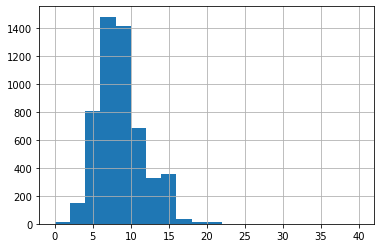

primary_cleaner.input.feed_size


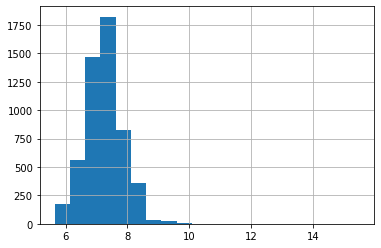

primary_cleaner.input.xanthate


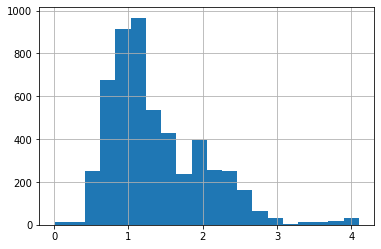

primary_cleaner.state.floatbank8_a_air


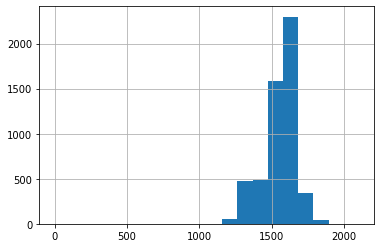

primary_cleaner.state.floatbank8_a_level


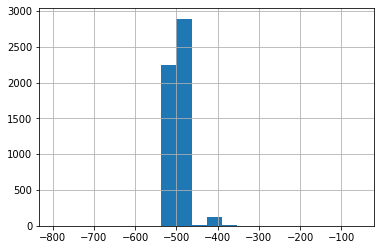

primary_cleaner.state.floatbank8_b_air


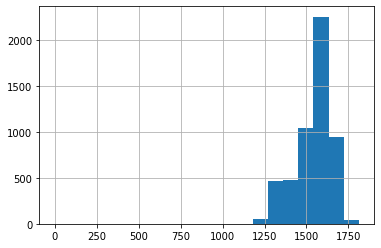

primary_cleaner.state.floatbank8_b_level


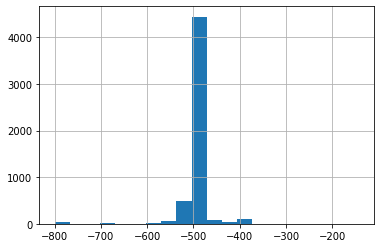

primary_cleaner.state.floatbank8_c_air


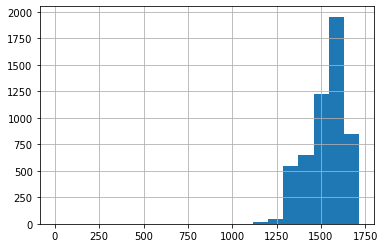

primary_cleaner.state.floatbank8_c_level


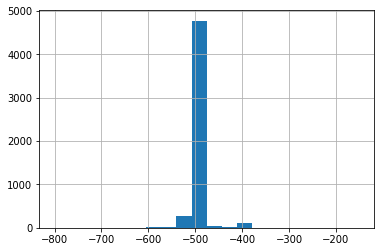

primary_cleaner.state.floatbank8_d_air


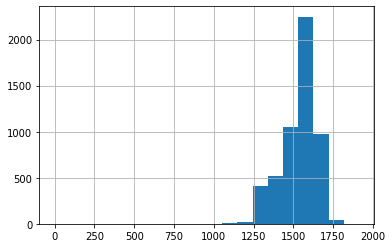

primary_cleaner.state.floatbank8_d_level


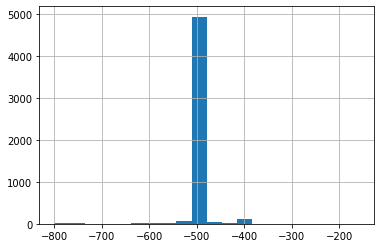

rougher.input.feed_ag


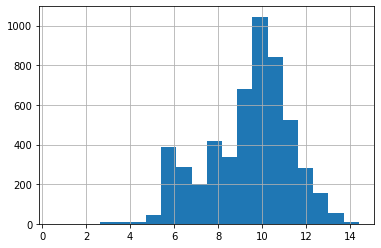

rougher.input.feed_pb


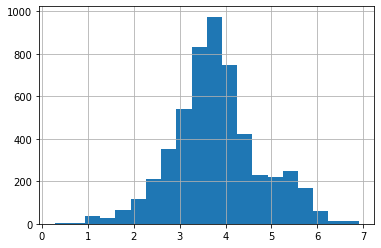

rougher.input.feed_rate


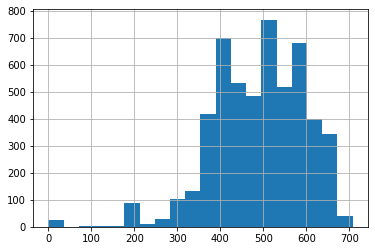

rougher.input.feed_size


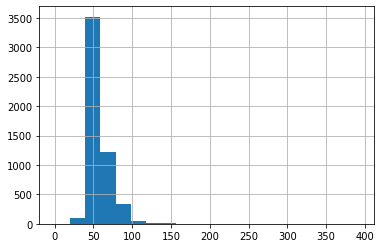

rougher.input.feed_sol


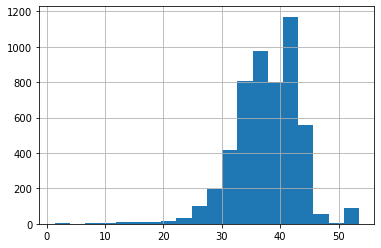

rougher.input.feed_au


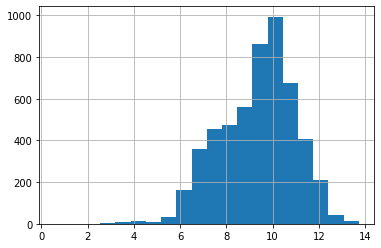

rougher.input.floatbank10_sulfate


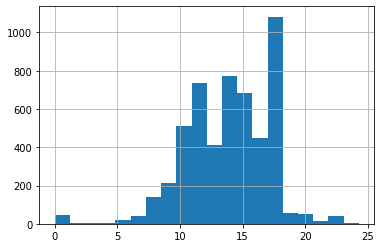

rougher.input.floatbank10_xanthate


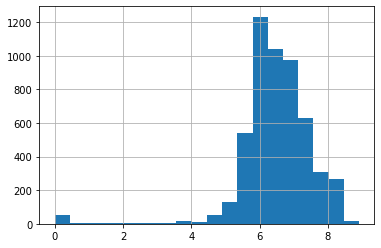

rougher.input.floatbank11_sulfate


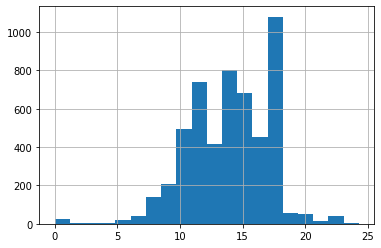

rougher.input.floatbank11_xanthate


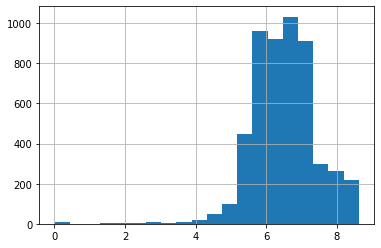

rougher.state.floatbank10_a_air


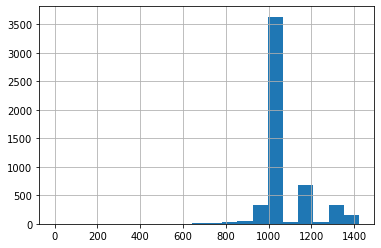

rougher.state.floatbank10_a_level


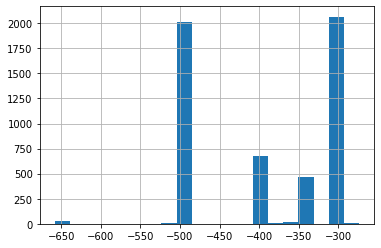

rougher.state.floatbank10_b_air


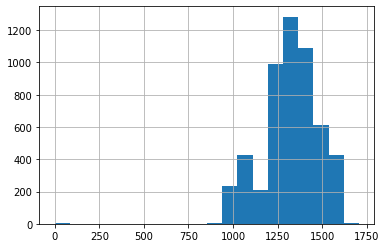

rougher.state.floatbank10_b_level


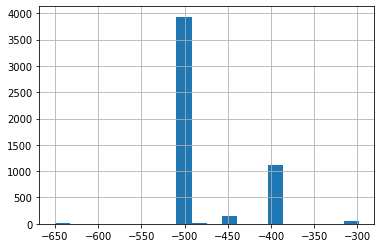

rougher.state.floatbank10_c_air


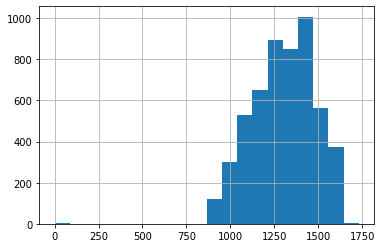

rougher.state.floatbank10_c_level


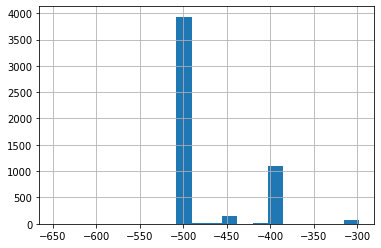

rougher.state.floatbank10_d_air


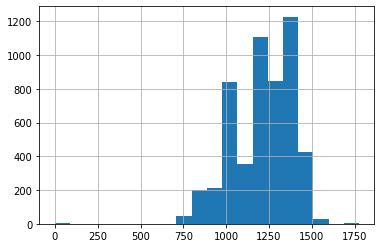

rougher.state.floatbank10_d_level


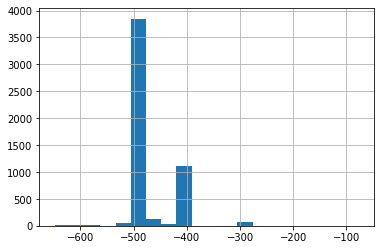

rougher.state.floatbank10_e_air


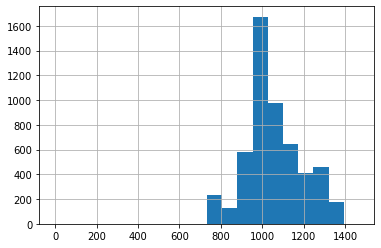

rougher.state.floatbank10_e_level


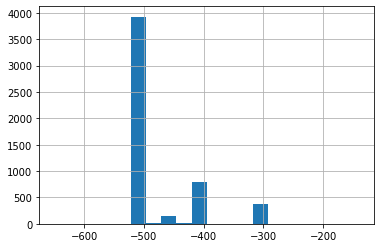

rougher.state.floatbank10_f_air


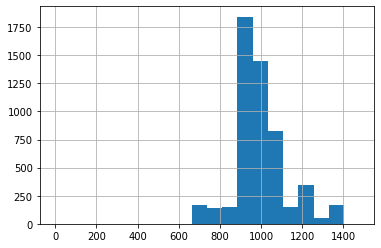

rougher.state.floatbank10_f_level


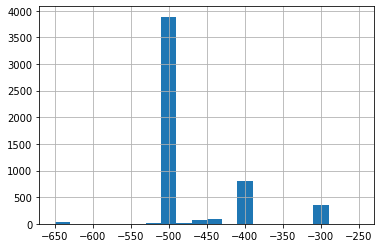

secondary_cleaner.state.floatbank2_a_air


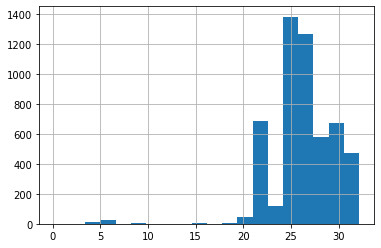

secondary_cleaner.state.floatbank2_a_level


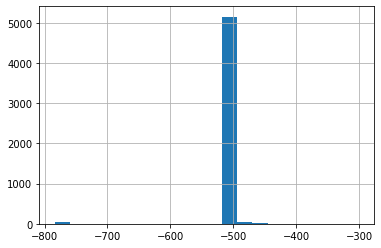

secondary_cleaner.state.floatbank2_b_air


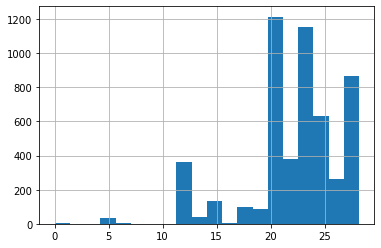

secondary_cleaner.state.floatbank2_b_level


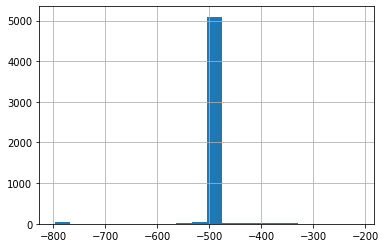

secondary_cleaner.state.floatbank3_a_air


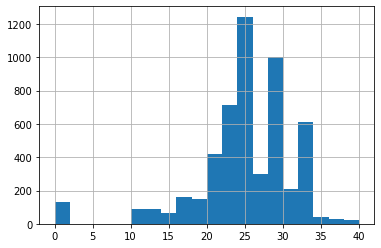

secondary_cleaner.state.floatbank3_a_level


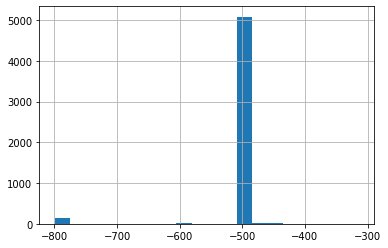

secondary_cleaner.state.floatbank3_b_air


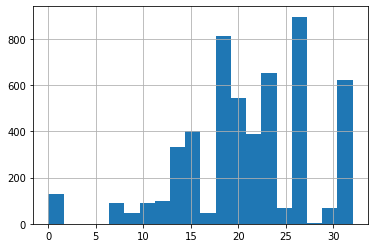

secondary_cleaner.state.floatbank3_b_level


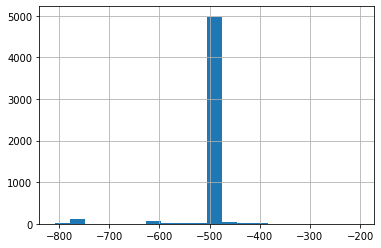

secondary_cleaner.state.floatbank4_a_air


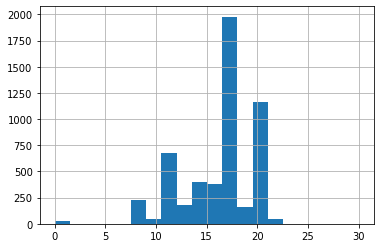

secondary_cleaner.state.floatbank4_a_level


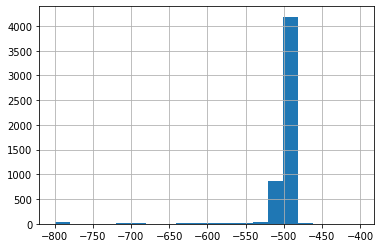

secondary_cleaner.state.floatbank4_b_air


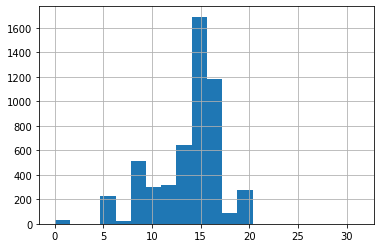

secondary_cleaner.state.floatbank4_b_level


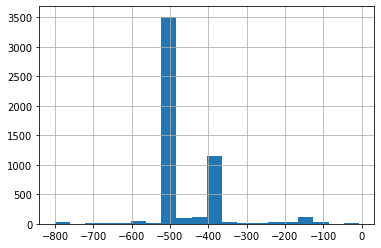

secondary_cleaner.state.floatbank5_a_air


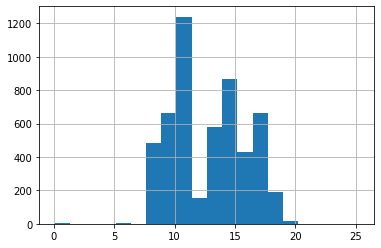

secondary_cleaner.state.floatbank5_a_level


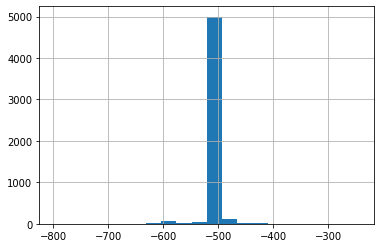

secondary_cleaner.state.floatbank5_b_air


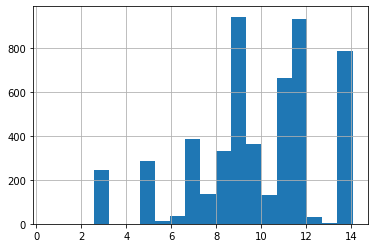

secondary_cleaner.state.floatbank5_b_level


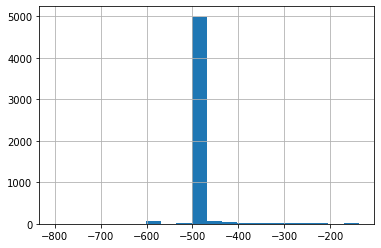

secondary_cleaner.state.floatbank6_a_air


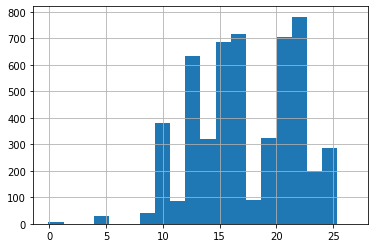

secondary_cleaner.state.floatbank6_a_level


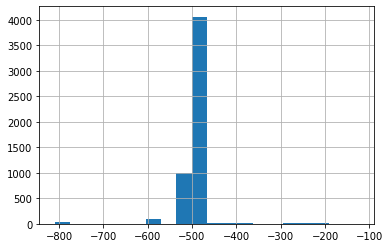

In [18]:
display(df_test.describe())
try:
    display(df_test.describe(include = ['object','bool','datetime'], datetime_is_numeric=True))
    for i in df_test.select_dtypes(include=['object','bool','datetime']):
        print('-----')
        if df_test[i].count() != len(df_test[i].unique()):
            print(df_test[i].value_counts())
        else:
            print('Все значения уникальны')
except:
    print('Все данные представлены в числовом формате')
print('-----')
for i in df_test:     
    if not ((df_test[i].dtype == 'object') & (len(df_test[i].unique()) > 20)):
        print(i)
        if (len(df_test[i].unique()) < 20):
            df_test[i].hist(bins=len(df_test[i].unique()))
            plt.show()  
        else:        
            df_test[i].hist(bins=20)
            plt.show()

<font color='DarkBlue'> 
📌 Предоставлено большое количество исходных данных. Данные отсортированы в порядке возрастания времени. В некоторых полях присутствует большее количество пропусков, чем в остальных. Есть пробелы во временном периоде, связанные с отсутствием записей по причине выделения из исходных данных обучающей выборки <br>
📌 Можно рассмотреть объекты с пропусками в полях и определить, есть ли корреляция с другими признаками <br>  
</font> 

In [19]:
df = pd.DataFrame()
for i in df_test.columns:
    if (len(df_test[df_test[i].isna()]) > 0):
        df = pd.concat([df_test[df_test[i].isna()], df])
df = df.drop_duplicates()
display(df)   

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
31,2016-09-02 10:59:59,64.558863,0.061864,7.1095,0.520084,1433.954958,-499.688476,1553.150053,-500.878552,1517.894908,-507.108257,1124.911941,-498.156657,8.138400,3.903507,485.929637,70.322458,44.276094,8.144801,9.435013,5.278592,9.081144,5.284294,1000.270639,-349.387437,1250.841286,-399.344115,1249.962813,-398.580569,1199.336006,-402.251450,997.504708,-400.750459,948.095197,-397.325402,25.097560,-499.829794,12.029984,-500.482332,NaN,-501.187631,12.007991,-506.368820,11.993753,-499.148736,8.129055,-500.125308,8.031323,-486.756657,5.047491,-467.938124,10.047098,-499.813489
32,2016-09-02 11:59:59,112.768923,6.061414,6.1500,0.819723,1426.909049,-500.749720,1544.540348,-501.570124,1509.087281,-504.328580,1155.663328,-498.748072,8.521644,3.885984,500.159628,77.206635,44.894493,8.156237,10.005237,5.591944,9.996164,5.598313,1000.678350,-350.181882,1249.590770,-401.880130,1249.794934,-402.143991,1203.829277,-401.651676,1000.538808,-401.464829,950.120669,-401.253866,25.114399,-500.224823,11.973063,-499.875561,NaN,-500.770087,12.012157,-500.548062,12.057341,-501.795391,8.100986,-501.032511,8.053520,-506.002857,5.025161,-447.918397,9.911242,-497.922919
33,2016-09-02 12:59:59,132.526641,8.257739,6.6715,0.803072,1419.081952,-499.519835,1530.869084,-499.749240,1494.243228,-499.770361,1077.569412,-499.811063,8.544087,3.942040,494.430227,74.223202,45.660274,8.283520,10.006594,5.600524,10.006470,5.601279,999.592488,-349.874866,1248.339846,-398.963858,1247.309356,-399.529153,1197.350029,-398.536292,1000.318731,-400.839432,949.492077,-393.888648,25.037717,-500.134492,12.035171,-500.149291,NaN,-499.934905,12.033624,-500.145056,12.059499,-499.670889,8.075180,-500.466176,8.077882,-509.265467,4.837108,-501.855340,9.891463,-504.150985
34,2016-09-02 13:59:59,138.109389,7.975929,7.6400,0.800642,1420.088768,-499.765691,1522.047015,-499.458234,1483.131191,-500.341037,1027.951019,-500.283853,8.054134,3.795038,506.442420,75.323449,44.450206,7.978776,9.995931,5.595679,10.005594,5.601865,999.807131,-350.080177,1250.494223,-400.535291,1248.959919,-400.203273,1205.861083,-401.473681,999.737519,-400.182823,949.791523,-

<font color='DarkBlue'> 
📌 Корреляция с другими признаками отсутствует, следовательно пропуски независимы. Вероятно их присутствие связано с определением ручных ошибок <br>
📌 Так как рассматриваемый процесс непрерывный и последовательный, все параметры изменяются относительно предыдущих записей в датафрейме. Следовательно, все неопределенные значения NaN лучше заполнить предыдущими, чем усредненными <br>
📌 Почти на всех гистограммах выделяются нулевые данные. Это аномалии, значения которых рекомендуется изменить на NaN, затем привести в соответствие с предыдущими по времени значениями. Другие аномальные значения скорее всего действительные. Исходных данных недостаточно, чтобы это определить, поэтому желательно их оставить <br>    
</font> 

In [20]:
df_test = df_test.replace(0, np.nan)
df_test = df_test.fillna(method='ffill')

<font color='DarkBlue'> 
📌 Рекомендуется преобразовать типы данных полей для оптимизации памяти <br>  
</font> 

In [21]:
df_test[df_test.select_dtypes(include=['int']).columns] = df_test.select_dtypes(include=['int']).apply(pd.to_numeric,downcast='unsigned')
df_test[df_test.select_dtypes(include=['float']).columns] = df_test.select_dtypes(include=['float']).apply(pd.to_numeric,downcast='float')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   date                                        5290 non-null   datetime64[ns]
 1   primary_cleaner.input.sulfate               5290 non-null   float32       
 2   primary_cleaner.input.depressant            5290 non-null   float32       
 3   primary_cleaner.input.feed_size             5290 non-null   float32       
 4   primary_cleaner.input.xanthate              5290 non-null   float32       
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float32       
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float32       
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float32       
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float32       
 9   primary_

<font color='DarkBlue'> 
📌 Нужно проанализировать признаки, недоступные в тестовой выборке, количество столбцов меньше, чем в обучающей. Для этого нужно обозначить ее поля, отсутствующие в тестовых данных <br>  
</font> 

In [22]:
df_train.drop(df_test.columns, axis=1).columns

Index(['final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb',
       'final.output.tail_sol', 'final.output.tail_au',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_feed',
       'rougher.calculation.au_pb_ratio', 'rougher.output.concentrate_ag',
       'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
       'rougher.output.concentrate_au', 'rougher.outpu

<font color='DarkBlue'> 
📌 В тестовой выборке отсутствуют параметры типов output и calculation, которые определяются на основании расчетов и данных, полученных с помощью обученных моделей <br> 
</font>  

### Анализ исходных данных

In [23]:
# Загрузка таблицы в память переменной df_full типа dataframe
df_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')
# Разделители для удобства отображения информации указаны в виде отдельных пунктов 'print("\033[1m\033[43m {}".format('----- Text -----'),"\033[0m")'
print('\033[1m\033[43m {}'.format('----- Просмотр общей информации о dataframe -----'),'\033[0m')
df_full.info()
print('\033[1m\033[43m {}'.format('----- Информация о заголовках полей dataframe -----'),'\033[0m')
print(df_full.columns)
print('\033[1m\033[43m {}'.format('----- Информация о типах полей dataframe -----'),'\033[0m')
print(df_full.dtypes)
print('\033[1m\033[43m {}'.format('----- Отображение на экране в читаемом виде первых записей таблицы dataframe для визуального анализа -----'),'\033[0m')
display(df_full.head())
print('Количество явных дубликатов', df_full.duplicated().sum())

 ----- Просмотр общей информации о dataframe ----- 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol   

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

Количество явных дубликатов 0


<font color='DarkBlue'> 
📌 В ходе первичного анализа данных сформированы следующие выводы: <br>
    
1. Отсутствует необходимость в редактировании заголовков, названия представлены в условно общепринятом формате 'змеиный_регистр'
2. Отсутствуют явные дубликаты, на данном этапе удаление строк не требуется
3. Обнаружены пропуски во многих столбцах. Желательно рассмотреть закономерность их проявления и заполнить подходящими для соответствующих записей значениями, оставить текущие или, в противном случае, удалить
4. Тип данных некоторых числовых полей желательно преобразовать для уменьшения требуемого объема памяти хранения данных, также необходимо конвертировать время в соответствующий тип. При использовании датасета в качестве выборки для машинного обучения этот столбец можно удалить, но в нем содержатся информативные данные, по которым можно упорядочить записи или провести дальнейший анализ
5. В данных таблицы некорректные значения не наблюдаются. Необходимо детально рассмотреть параметры каждого столбца
6. Количество столбцов совпадает с их количеством в обучающей выборке, сумма объектов тренировочной и тестовой выборок соответствует количеству строк в исходных данных. Целевые признаки, соответствующие тестовой выборке, содержат фактические данные, с которыми в дальнейшем можно производить сравнения предсказанных значений   
</font>

In [24]:
df_full['date'] = pd.to_datetime(df_full['date'],format='%Y-%m-%d %H:%M:%S')

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000,19439.000000,19415.000000,19402.000000,19439.000000,19335.000000,19439.000000,19323.000000,19069.000000,19439.000000,19435.000000,19418.000000,19377.000000,19439.000000,1.943500e+04,19438.000000,1.943500e+04,19438.000000,1.943700e+04,19438.000000,1.943600e+04,19438.000000,1.943700e+04,19437.000000,19437.000000,19439.000000,19439.000000,19339.000000,19428.000000,19294.000000,19340.000000,19439.000000,19405.000000,19431.000000,19395.000000,18986.000000,19439.000000,19439.000000,19416.000000,19439.000000,19439.000000,19438.000000,19439.000000,19439.000000,19439.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19439.000000,19439.000000,19003.000000,19439.000000,19439.000000,19439.000000,19437.000000,19427.000000,17691.000000,19439.000000,19219.000000,19438.000000,19416.000000,19438.000000,19426.000000,19438.000000,19438.000000,19438.000000,19433.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438

,date
count,19439
mean,2017-04-30 01:59:24.284531200
min,2016-01-15 00:00:00
25%,2016-09-08 18:59:59
50%,2017-04-25 17:59:59
75%,2017-12-09 14:29:59
max,2018-08-18 10:59:59


-----
Все значения уникальны
-----
date


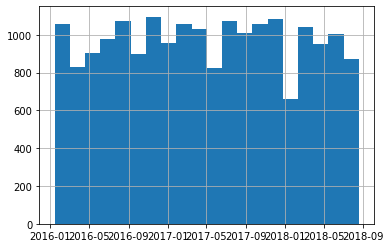

final.output.concentrate_ag


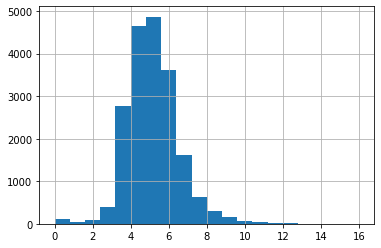

final.output.concentrate_pb


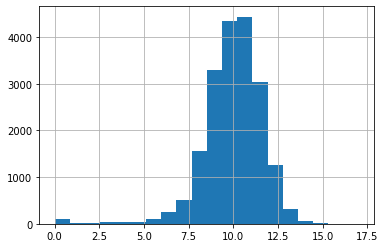

final.output.concentrate_sol


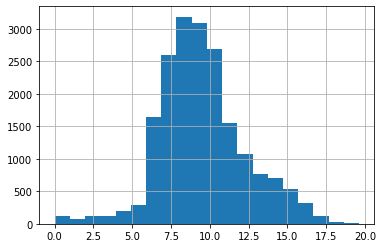

final.output.concentrate_au


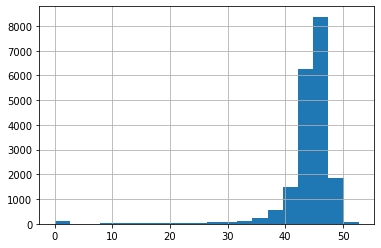

final.output.recovery


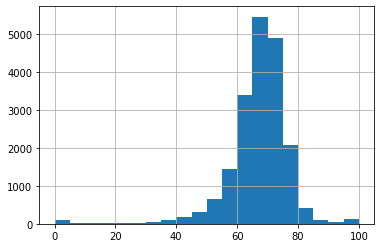

final.output.tail_ag


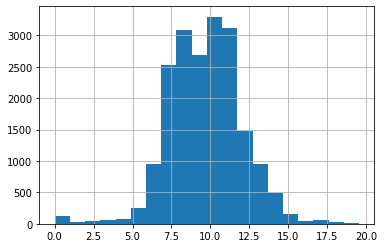

final.output.tail_pb


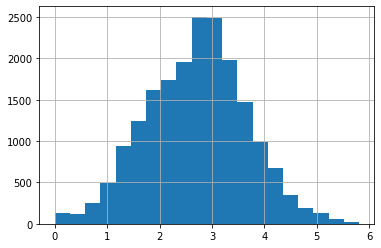

final.output.tail_sol


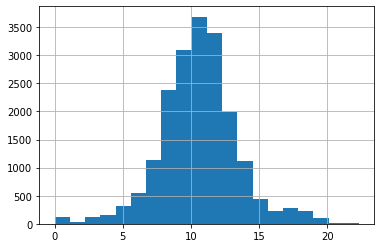

final.output.tail_au


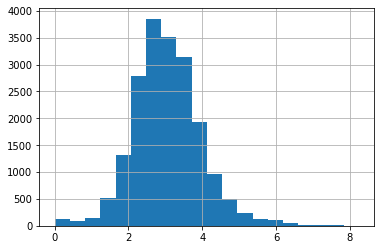

primary_cleaner.input.sulfate


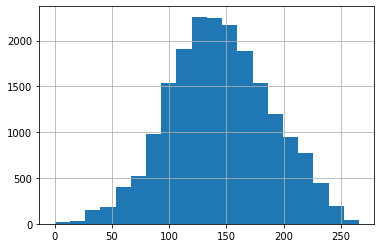

primary_cleaner.input.depressant


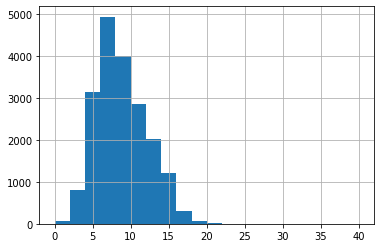

primary_cleaner.input.feed_size


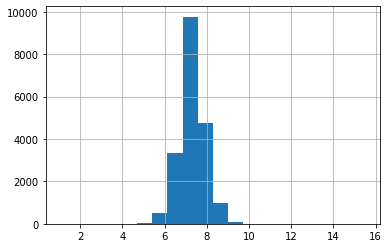

primary_cleaner.input.xanthate


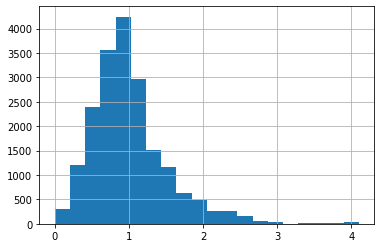

primary_cleaner.output.concentrate_ag


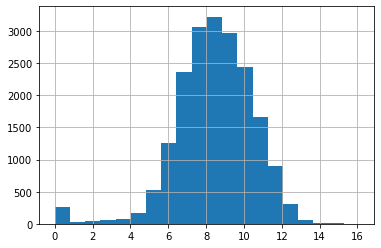

primary_cleaner.output.concentrate_pb


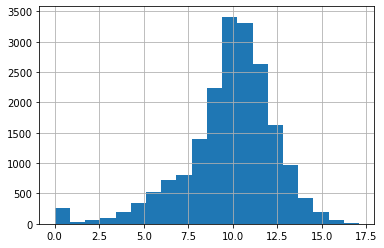

primary_cleaner.output.concentrate_sol


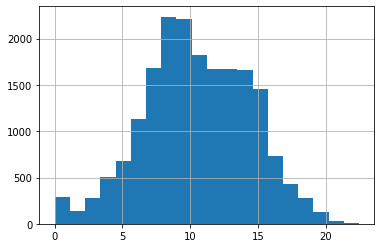

primary_cleaner.output.concentrate_au


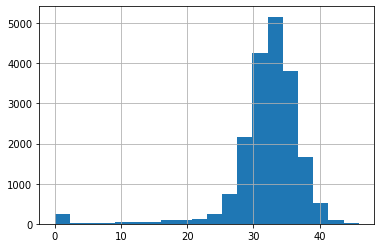

primary_cleaner.output.tail_ag


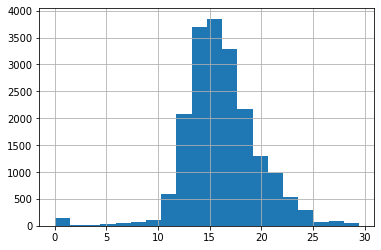

primary_cleaner.output.tail_pb


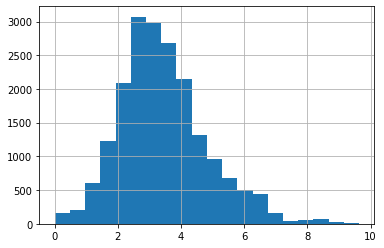

primary_cleaner.output.tail_sol


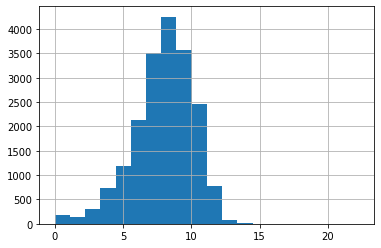

primary_cleaner.output.tail_au


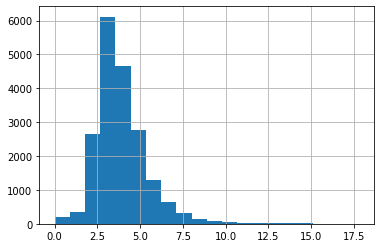

primary_cleaner.state.floatbank8_a_air


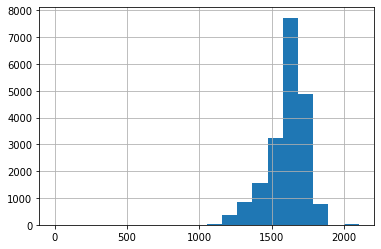

primary_cleaner.state.floatbank8_a_level


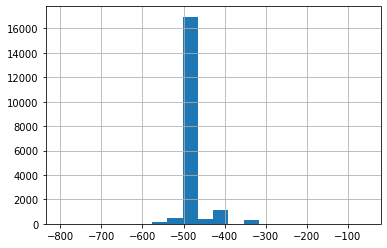

primary_cleaner.state.floatbank8_b_air


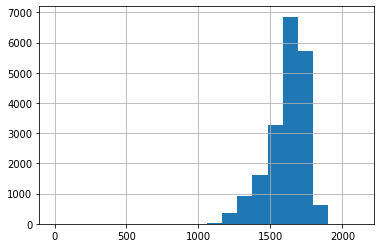

primary_cleaner.state.floatbank8_b_level


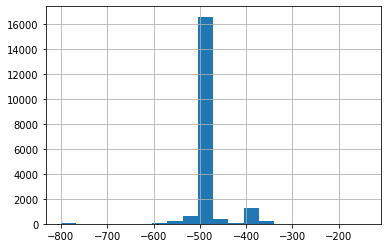

primary_cleaner.state.floatbank8_c_air


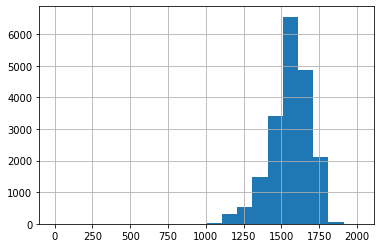

primary_cleaner.state.floatbank8_c_level


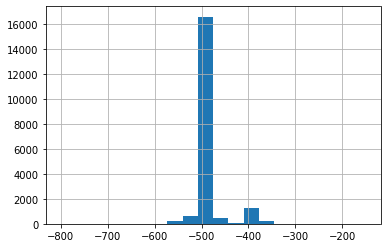

primary_cleaner.state.floatbank8_d_air


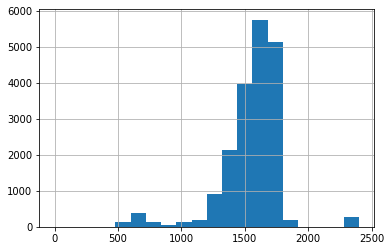

primary_cleaner.state.floatbank8_d_level


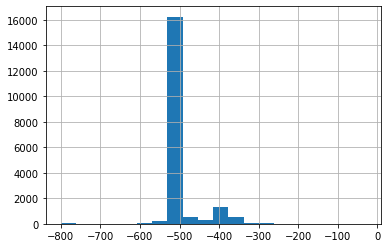

rougher.calculation.sulfate_to_au_concentrate


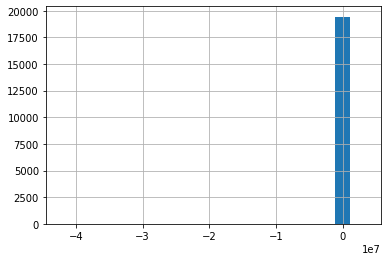

rougher.calculation.floatbank10_sulfate_to_au_feed


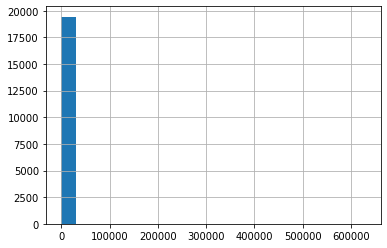

rougher.calculation.floatbank11_sulfate_to_au_feed


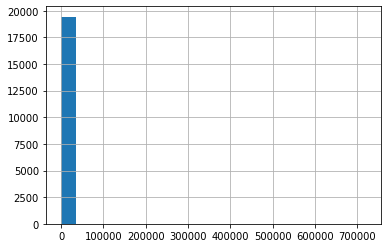

rougher.calculation.au_pb_ratio


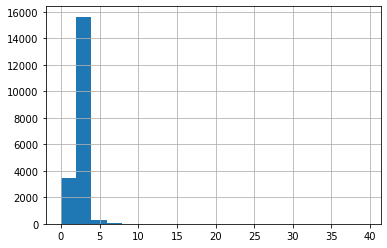

rougher.input.feed_ag


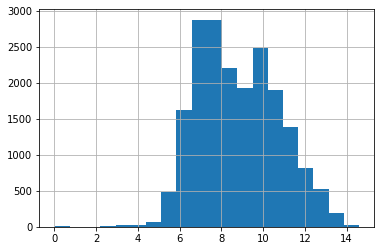

rougher.input.feed_pb


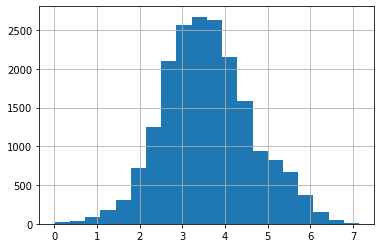

rougher.input.feed_rate


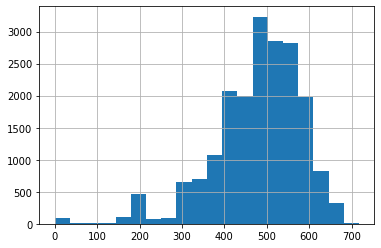

rougher.input.feed_size


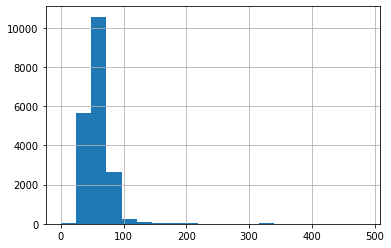

rougher.input.feed_sol


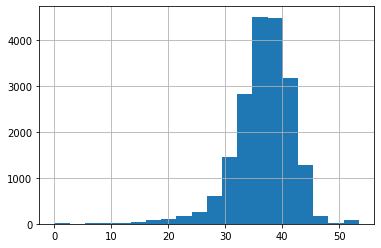

rougher.input.feed_au


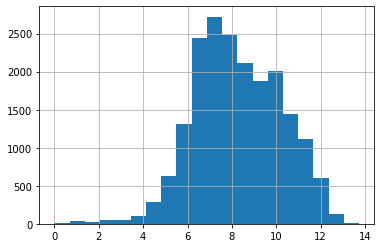

rougher.input.floatbank10_sulfate


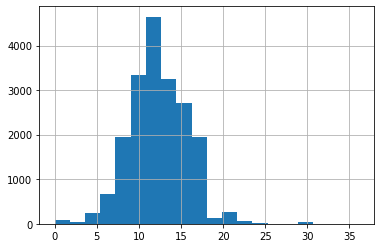

rougher.input.floatbank10_xanthate


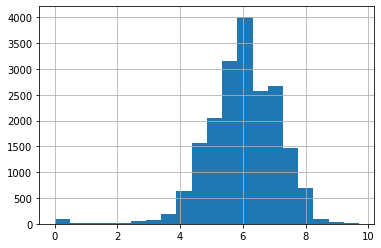

rougher.input.floatbank11_sulfate


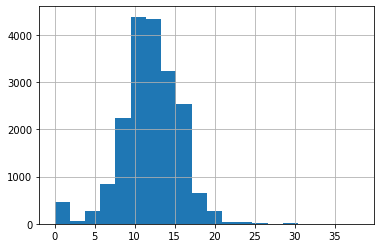

rougher.input.floatbank11_xanthate


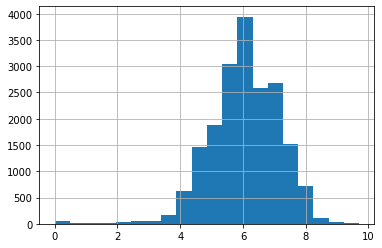

rougher.output.concentrate_ag


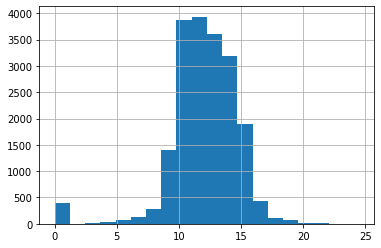

rougher.output.concentrate_pb


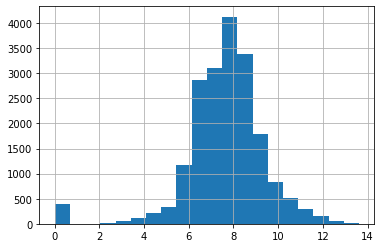

rougher.output.concentrate_sol


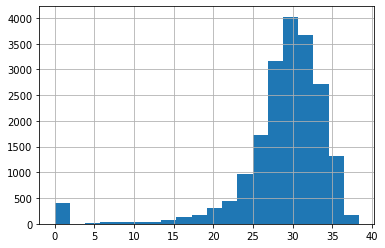

rougher.output.concentrate_au


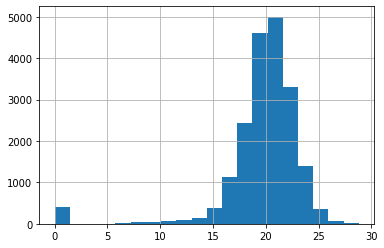

rougher.output.recovery


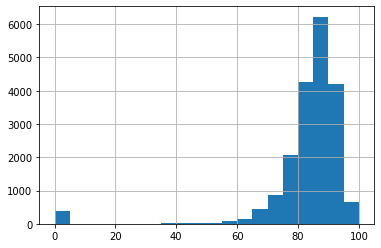

rougher.output.tail_ag


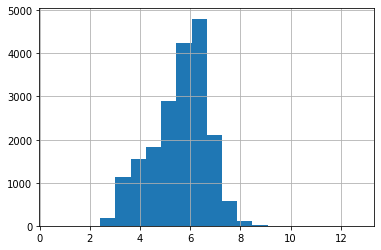

rougher.output.tail_pb


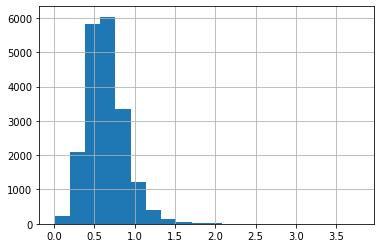

rougher.output.tail_sol


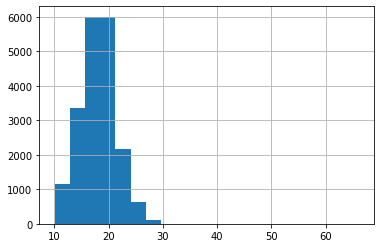

rougher.output.tail_au


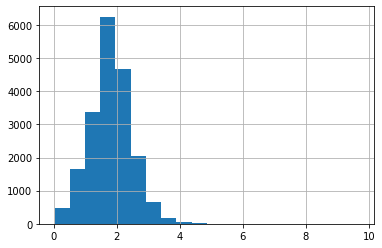

rougher.state.floatbank10_a_air


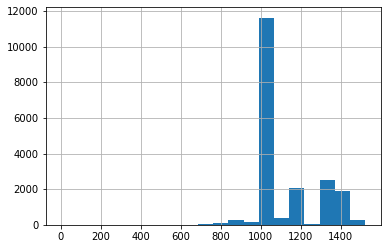

rougher.state.floatbank10_a_level


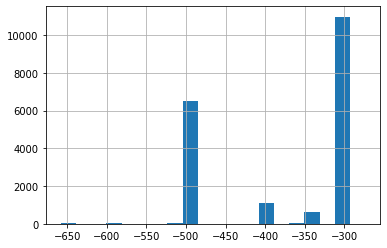

rougher.state.floatbank10_b_air


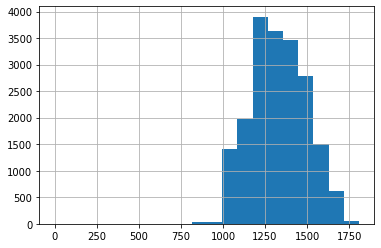

rougher.state.floatbank10_b_level


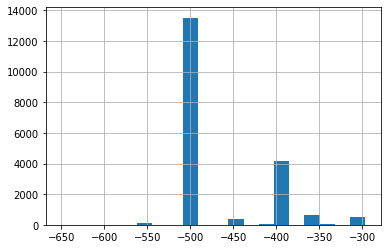

rougher.state.floatbank10_c_air


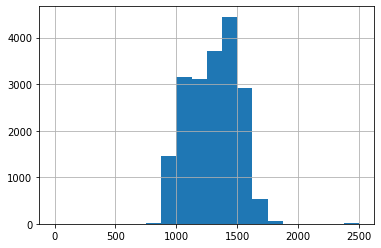

rougher.state.floatbank10_c_level


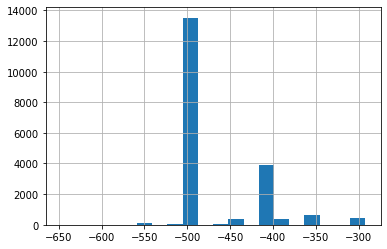

rougher.state.floatbank10_d_air


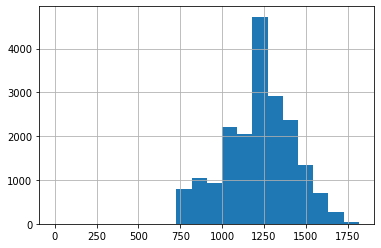

rougher.state.floatbank10_d_level


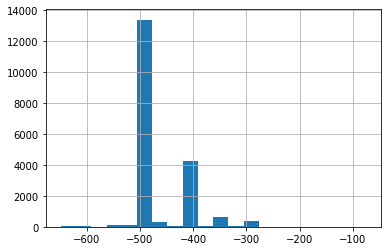

rougher.state.floatbank10_e_air


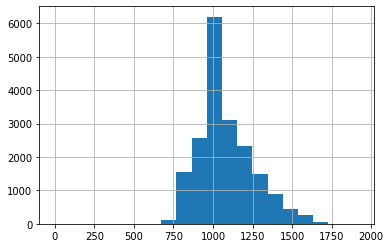

rougher.state.floatbank10_e_level


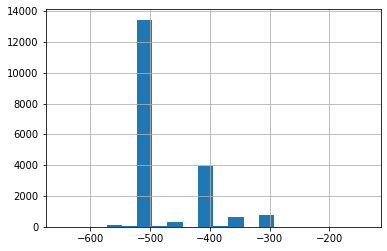

rougher.state.floatbank10_f_air


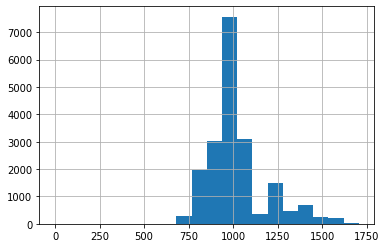

rougher.state.floatbank10_f_level


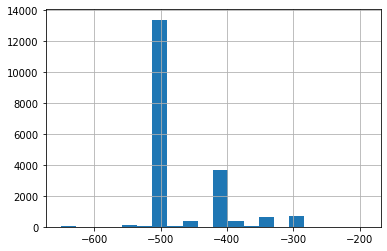

secondary_cleaner.output.tail_ag


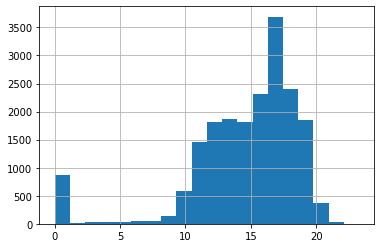

secondary_cleaner.output.tail_pb


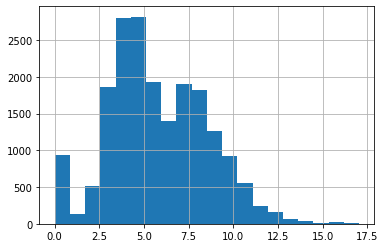

secondary_cleaner.output.tail_sol


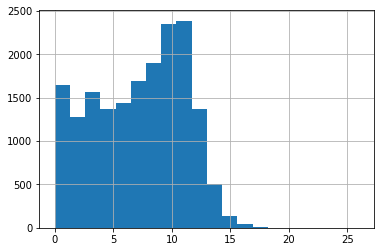

secondary_cleaner.output.tail_au


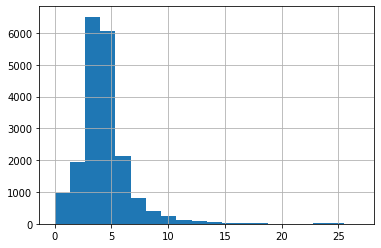

secondary_cleaner.state.floatbank2_a_air


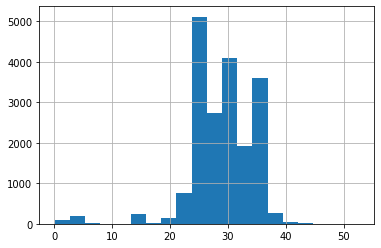

secondary_cleaner.state.floatbank2_a_level


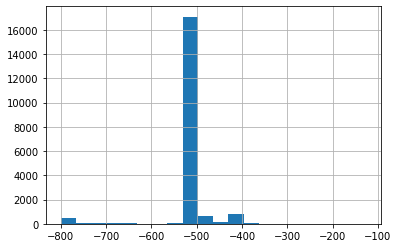

secondary_cleaner.state.floatbank2_b_air


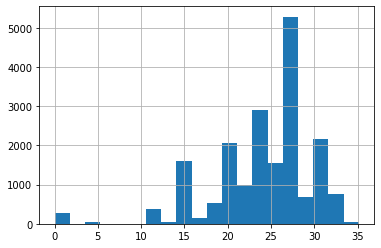

secondary_cleaner.state.floatbank2_b_level


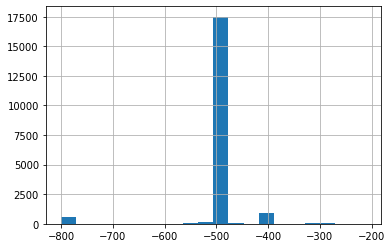

secondary_cleaner.state.floatbank3_a_air


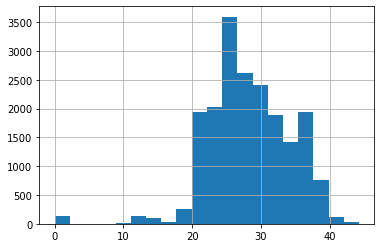

secondary_cleaner.state.floatbank3_a_level


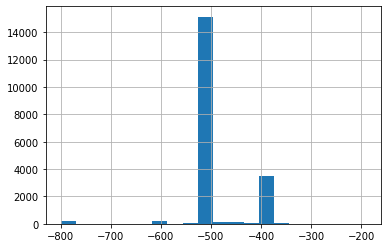

secondary_cleaner.state.floatbank3_b_air


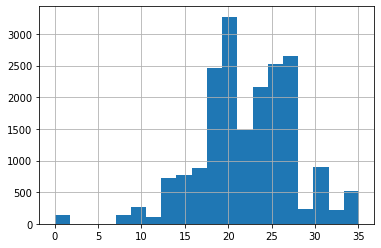

secondary_cleaner.state.floatbank3_b_level


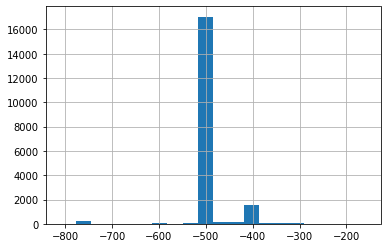

secondary_cleaner.state.floatbank4_a_air


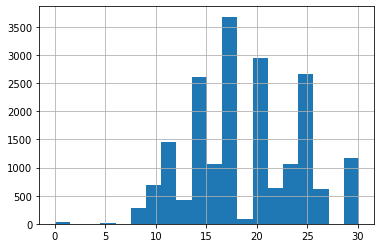

secondary_cleaner.state.floatbank4_a_level


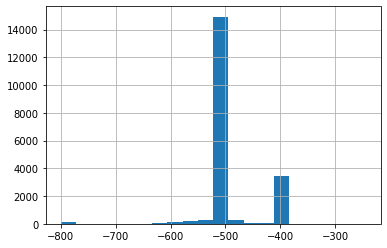

secondary_cleaner.state.floatbank4_b_air


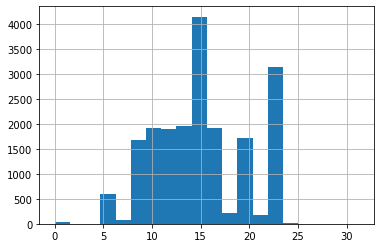

secondary_cleaner.state.floatbank4_b_level


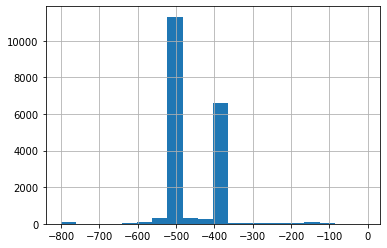

secondary_cleaner.state.floatbank5_a_air


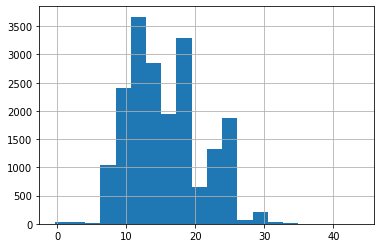

secondary_cleaner.state.floatbank5_a_level


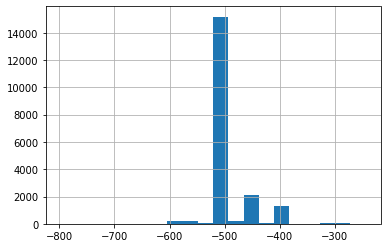

secondary_cleaner.state.floatbank5_b_air


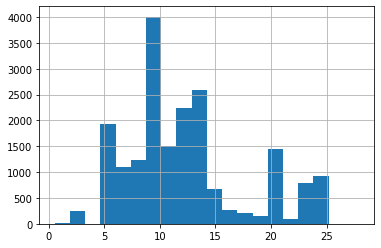

secondary_cleaner.state.floatbank5_b_level


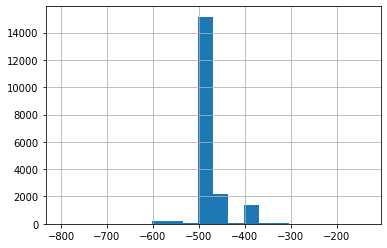

secondary_cleaner.state.floatbank6_a_air


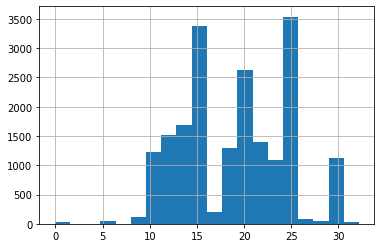

secondary_cleaner.state.floatbank6_a_level


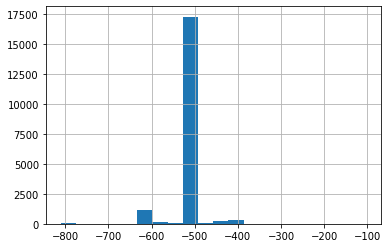

In [25]:
display(df_full.describe())
try:
    display(df_full.describe(include = ['object','bool','datetime'], datetime_is_numeric=True))
    for i in df_full.select_dtypes(include=['object','bool','datetime']):
        print('-----')
        if df_full[i].count() != len(df_full[i].unique()):
            print(df_full[i].value_counts())
        else:
            print('Все значения уникальны')
except:
    print('Все данные представлены в числовом формате')
print('-----')
for i in df_full:     
    if not ((df_full[i].dtype == 'object') & (len(df_full[i].unique()) > 20)):
        print(i)
        if (len(df_full[i].unique()) < 20):
            df_full[i].hist(bins=len(df_full[i].unique()))
            plt.show()  
        else:        
            df_full[i].hist(bins=20)
            plt.show()

<font color='DarkBlue'> 
📌 Предоставлено большое количество исходных данных. Данные отсортированы в порядке возрастания времени. В некоторых полях присутствует большее количество пропусков, чем в остальных. Пробелы во временном периоде отсутствует, так как используется исходный датасет за полный период <br>
📌 Можно рассмотреть объекты с пропусками в полях и определить, есть ли корреляция с другими признаками <br>  
</font> 

In [26]:
df = pd.DataFrame()
for i in df_full.columns:
    if (len(df_full[df_full[i].isna()]) > 0):
        df = pd.concat([df_full[df_full[i].isna()], df])
df = df.drop_duplicates()
display(df)   

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
114,2016-01-21 10:00:00,5.782224,10.969985,9.301260,43.181003,74.257359,11.959760,2.064173,15.139256,3.091437,NaN,NaN,7.2500,NaN,11.345656,9.424562,20.275368,31.333106,17.514891,3.971093,7.845526,3.162975,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.367651,12.028591,4.203939,NaN,NaN,41.782570,9.953462,NaN,NaN,NaN,NaN,13.678706,7.790201,28.779023,19.650397,86.217222,6.055658,0.862177,19.770304,2.435464,NaN,NaN,NaN,NaN,NaN,NaN,1393.735867,-501.357678,1196.516363,-505.322143,1097.010735,-499.416892,16.134409,5.427901,12.116604,3.259027,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11504,2017-07-23 23:59:59,0.000000,0.000000,0.000000,0.000000,0.000000,3.735853,1.375197,4.186355,2.076641,34.339088,1.425304,7.3000,0.073258,5.933491,NaN,NaN,33.079340,18.273365,2.826770,NaN,5.993227,1637.458546,-500.852344,1900.825938,-525.307129,956.232764,-471.134030,1521.427975,-504.389254,44953.836178,5448.105077,5444.414594,2.108807,7.083060,2.897126,400.519737,49.212570,29.299571,6.109481,12.725522,3.630163,12.715368,4.151391,4.758325,4.427165,20.5

<font color='DarkBlue'> 
📌 Корреляция с другими признаками отсутствует, следовательно пропуски независимы. Их наличие связано с присутствием ручных ошибок во время заполнения полей <br>
📌 Так как рассматриваемый процесс непрерывный и последовательный, все параметры изменяются относительно предыдущих записей в датафрейме. Следовательно, все неопределенные значения NaN лучше заполнить предыдущими, чем усредненными <br>
📌 Почти на всех гистограммах выделяются нулевые данные. Это аномалии, значения которых рекомендуется изменить на NaN, затем привести в соответствие с предыдущими по времени значениями. Другие аномальные значения скорее всего действительные. Исходных данных недостаточно, чтобы это определить, поэтому желательно их оставить <br>    
</font> 

In [27]:
df_full = df_full.replace(0, np.nan)
df_full = df_full.fillna(method='ffill')

<font color='DarkBlue'> 
📌 Рекомендуется преобразовать типы данных полей для оптимизации памяти <br>  
</font> 

In [28]:
df_full[df_full.select_dtypes(include=['int']).columns] = df_full.select_dtypes(include=['int']).apply(pd.to_numeric,downcast='unsigned')
df_full[df_full.select_dtypes(include=['float']).columns] = df_full.select_dtypes(include=['float']).apply(pd.to_numeric,downcast='float')
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                19439 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         19439 non-null  float32       
 2   final.output.concentrate_pb                         19439 non-null  float32       
 3   final.output.concentrate_sol                        19439 non-null  float32       
 4   final.output.concentrate_au                         19439 non-null  float32       
 5   final.output.recovery                               19439 non-null  float32       
 6   final.output.tail_ag                                19439 non-null  float32       
 7   final.output.tail_pb                                19439 non-null  float32       
 8   final.

## Анализ данных

<font color='DarkBlue'> 
📌 Следует проанализировать, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки <br>
📌 Для этого нужно построить график временных рядов для исследуемых параметров на разных стадиях очистки <br>
📌 Также можно обозначить гистограммы распределения значений по тем же данным <br>
</font> 

ag


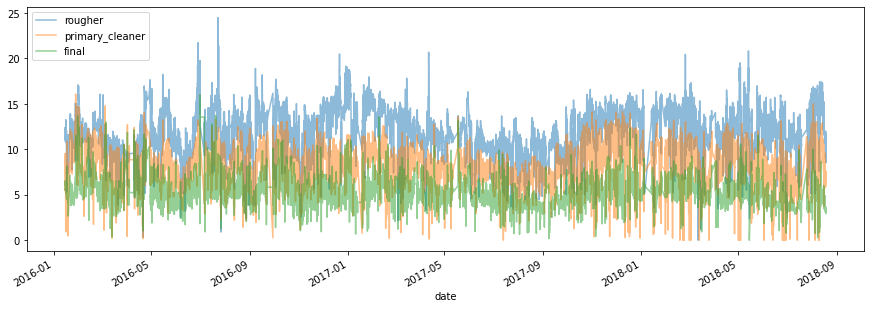

pb


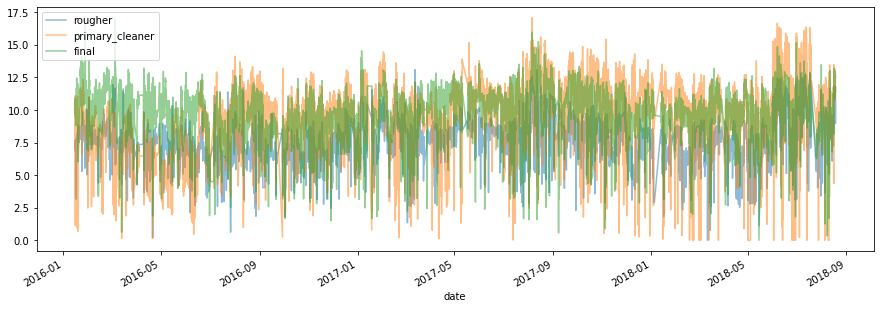

au


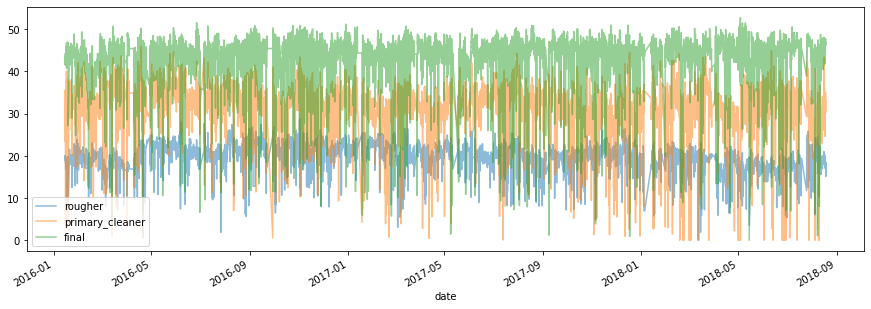

sol


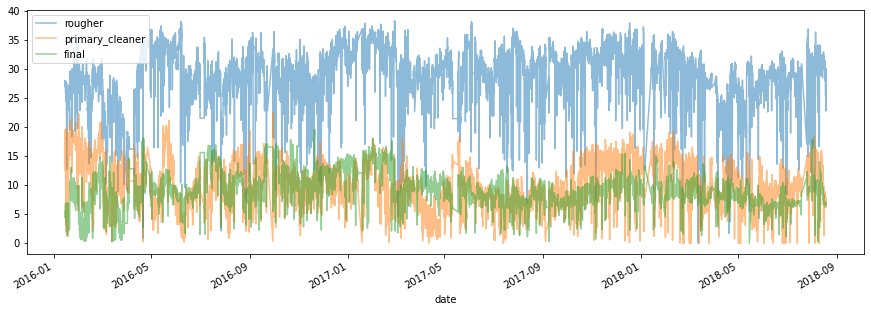

In [29]:
print('ag')
df_full.plot(x='date', y=['rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag'], label=['rougher', 'primary_cleaner', 'final'], alpha = 0.5, figsize=(15,5))
plt.legend()
plt.show()
print('pb')
df_full.plot(x='date', y=['rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb'], label=['rougher', 'primary_cleaner', 'final'], alpha = 0.5, figsize=(15,5))
plt.legend()
plt.show()
print('au')
df_full.plot(x='date', y=['rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au'], label=['rougher', 'primary_cleaner', 'final'], alpha = 0.5, figsize=(15,5))
plt.legend()
plt.show()
print('sol')
df_full.plot(x='date', y=['rougher.output.concentrate_sol', 'primary_cleaner.output.concentrate_sol', 'final.output.concentrate_sol'], label=['rougher', 'primary_cleaner', 'final'], alpha = 0.5, figsize=(15,5))
plt.legend()
plt.show()

ag


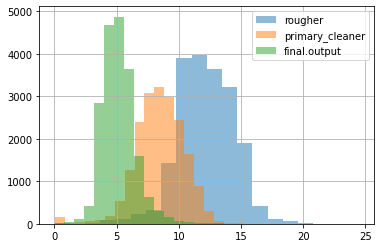

pb


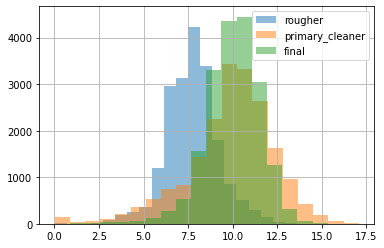

au


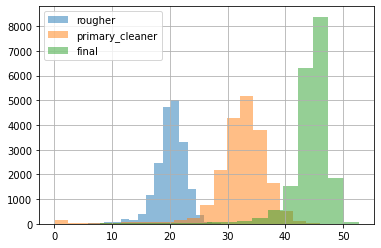

sol


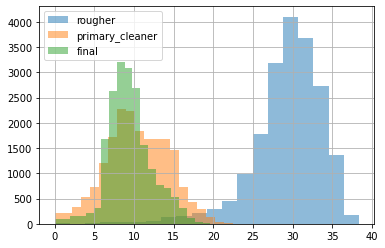

In [30]:
print('ag')
df_full['rougher.output.concentrate_ag'].hist(bins=20, label='rougher', alpha = 0.5)
df_full['primary_cleaner.output.concentrate_ag'].hist(bins=20, label='primary_cleaner', alpha = 0.5)
df_full['final.output.concentrate_ag'].hist(bins=20, label='final.output', alpha = 0.5)
plt.legend()
plt.show()
print('pb')
df_full['rougher.output.concentrate_pb'].hist(bins=20, label='rougher', alpha = 0.5)
df_full['primary_cleaner.output.concentrate_pb'].hist(bins=20, label='primary_cleaner', alpha = 0.5)
df_full['final.output.concentrate_pb'].hist(bins=20, label='final', alpha = 0.5)
plt.legend()
plt.show()
print('au')
df_full['rougher.output.concentrate_au'].hist(bins=20, label='rougher', alpha = 0.5)
df_full['primary_cleaner.output.concentrate_au'].hist(bins=20, label='primary_cleaner', alpha = 0.5)
df_full['final.output.concentrate_au'].hist(bins=20, label='final', alpha = 0.5)
plt.legend()
plt.show()
print('sol')
df_full['rougher.output.concentrate_sol'].hist(bins=20, label='rougher', alpha = 0.5)
df_full['primary_cleaner.output.concentrate_sol'].hist(bins=20, label='primary_cleaner', alpha = 0.5)
df_full['final.output.concentrate_sol'].hist(bins=20, label='final', alpha = 0.5)
plt.legend()
plt.show()

<font color='DarkBlue'> 
📌 На каждом последующем этапе концентрация металлов, выраженная в процентном соотношении, уменьшается по отношению к ее значению на предыдущем этапе (не исходного сырья) <br> 
📌 Утверждение справедливо для концентрации всех металлов, кроме pb, изменение которой по отношению к текущему составу сырья отсутствует или увеличивается после этапа флотации <br> 
📌 Концентрация sol значительно уменьшается только после этапа флотации <br>   
📌 Концентрация золота равномерно увеличивается и близка к 50% после финального этапа обогащения <br>
📌 Далее требуется сравнить распределения размеров гранул сырья на обучающей и тестовой выборках и определить корректность оценки, то есть проверить гипотезу: значения, полученные для тестовой выбоки, соответствуют действительным <br>
</font> 

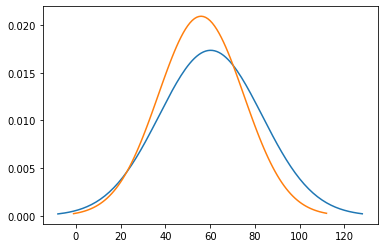

In [31]:
plt.plot(range(int(df_train['rougher.input.feed_size'].mean() - 3 * df_train['rougher.input.feed_size'].std()), int(df_train['rougher.input.feed_size'].mean() + 3 * df_train['rougher.input.feed_size'].std())),st.norm.pdf(range(int(df_train['rougher.input.feed_size'].mean() - 3 * df_train['rougher.input.feed_size'].std()), int(df_train['rougher.input.feed_size'].mean() + 3 * df_train['rougher.input.feed_size'].std())), df_train['rougher.input.feed_size'].mean(), df_train['rougher.input.feed_size'].std()))
plt.plot(range(int(df_test['rougher.input.feed_size'].mean() - 3 * df_test['rougher.input.feed_size'].std()), int(df_test['rougher.input.feed_size'].mean() + 3 * df_test['rougher.input.feed_size'].std())),st.norm.pdf(range(int(df_test['rougher.input.feed_size'].mean() - 3 * df_test['rougher.input.feed_size'].std()), int(df_test['rougher.input.feed_size'].mean() + 3 * df_test['rougher.input.feed_size'].std())), df_test['rougher.input.feed_size'].mean(), df_test['rougher.input.feed_size'].std()))
plt.show()

<font color='DarkBlue'> 
📌 Визуально заметно, что распределения выглядят похожими, необходимо проверить нулевую гипотезу, являющуюся двухсторонней, используя методы t-теста, с помощью сравнения средних двух независимых генеральных совокупностей, относящихся к разным выборкам. Соответственно, нулевая гипотеза повествует о совпадении рассматриваемых совокупностей. Критичный параметр 'альфа' стандартно можно принять раным 1%, определяющим, что в разброс значений для утверждения нулевой гипотезы не входят области по 0.5% с каждой стороны графика <br>
</font> 

In [32]:
alpha = .01 # критический уровень статистической значимости
# если p-value окажется меньше него - можно отвергнуть гипотезу
results = st.ttest_ind(df_train['rougher.input.feed_size'], df_test['rougher.input.feed_size'], equal_var = False)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергается нулевая гипотеза')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 3.134361835172803e-39
Отвергается нулевая гипотеза


<font color='DarkBlue'> 
📌 Нулевая гипотеза отвергнута, соответственно, обучающая и тестовая выборки различаются. P-value намного меньше 1%, значит однозначно гипотеза не будет верна: предсказания, полученные для тестовой выборки значительно различаются с фактическими, оценка модели неправильная <br> 
📌 Можно проверить гипотезу методом bootstrap из выборок в цикле из 1000 итераций с случайно комбинируемыми наборами данных, полученных разделением их общей совокупности <br>
</font> 

In [33]:
main_difference = abs(df_train['rougher.input.feed_size'].mean() - df_test['rougher.input.feed_size'].mean())
print("Разность выборок:", main_difference)
alpha = 0.01
state = np.random.RandomState(12345)
bootstrap_samples = 1000
count = 0
for i in range(bootstrap_samples):
    united_samples = pd.concat([df_train['rougher.input.feed_size'], df_test['rougher.input.feed_size']])
    subsample = united_samples.sample(frac=0.1, replace=True, random_state=state)
    subsample_1 = subsample[:len(df_train['rougher.input.feed_size'])]
    subsample_2 = subsample[len(df_train['rougher.input.feed_size']):]
    bootstrap_difference = abs(subsample_1.mean() - subsample_2.mean())
    if bootstrap_difference >= main_difference:
        count += 1
print('count =', count)
pvalue = count / bootstrap_samples
print('p-value =', pvalue)
if pvalue < alpha:
    print("Отвергается нулевая гипотеза: разница есть")
else:
    print("Не получилось отвергнуть нулевую гипотезу: разницы нет")

Разность выборок: 4.2871017
count = 0
p-value = 0.0
Отвергается нулевая гипотеза: разница есть


<font color='DarkBlue'> 
📌 Необходимый уровень статистической значимости не может быть получен, следовательно, оценка модели, используемой для предсказания рассматриваемых значений, неверна <br> 
📌 Требуется исследовать суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. Для этого нужно создать дополнительные поля с суммой всех включений и построить гистограмму распределения значений <br>
</font> 

In [36]:
df_full['rougher.input.feed_sum'] = df_full['rougher.input.feed_ag'] + df_full['rougher.input.feed_pb'] + df_full['rougher.input.feed_au'] + df_full['rougher.input.feed_sol']
df_full['rougher.output.concentrate_sum'] = df_full['rougher.output.concentrate_ag'] + df_full['rougher.output.concentrate_pb'] + df_full['rougher.output.concentrate_au'] + df_full['rougher.output.concentrate_sol']
#df_full['primary_cleaner.output.concentrate_sum'] = df_full['primary_cleaner.output.concentrate_ag'] + df_full['primary_cleaner.output.concentrate_pb'] + df_full['primary_cleaner.output.concentrate_au'] + df_full['primary_cleaner.output.concentrate_sol']
df_full['final.output.concentrate_sum'] = df_full['final.output.concentrate_ag'] + df_full['final.output.concentrate_pb'] + df_full['final.output.concentrate_au'] + df_full['final.output.concentrate_sol']

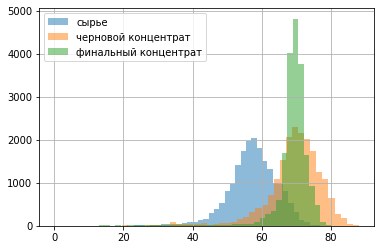

In [38]:
df_full['rougher.input.feed_sum'].hist(bins=50, label='сырье', alpha = 0.5)
df_full['rougher.output.concentrate_sum'].hist(bins=50, label='черновой концентрат', alpha = 0.5)
#df_full['primary_cleaner.output.concentrate_sum'].hist(bins=50, label='primary_cleaner', alpha = 0.5)
df_full['final.output.concentrate_sum'].hist(bins=50, label='финальный концентрат', alpha = 0.5)
plt.legend()
plt.show()

<font color='DarkBlue'> 
📌 Заметно, что присутствуют аномальные значения в левой части гистограммы, близкие к 0, так как в сырье не могут отсутствовать все рассматриваемые металлы. Необходимо удалить подобные записи из исходной и обучающей выборок <br> 
📌 Можно рассмотреть гистрограмму с суммарными значениями включений от 20 <br>
</font> 

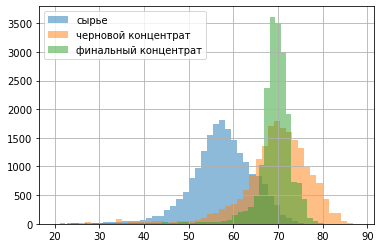

In [40]:
df_full['rougher.input.feed_sum'].hist(bins=50, label='сырье', alpha = 0.5, range=(20, df_full['rougher.output.concentrate_sum'].max()))
df_full['rougher.output.concentrate_sum'].hist(bins=50, label='черновой концентрат', alpha = 0.5, range=(20, df_full['rougher.output.concentrate_sum'].max()))
#df_full['primary_cleaner.output.concentrate_sum'].hist(bins=50, label='primary_cleaner', alpha = 0.5, range=(20, df_full['primary_cleaner.output.concentrate_sum'].max()))
df_full['final.output.concentrate_sum'].hist(bins=50, label='финальный концентрат', alpha = 0.5, range=(20, df_full['final.output.concentrate_sum'].max()))
plt.legend()
plt.show()

<font color='DarkBlue'> 
📌 На данном графике аномалии не выделяются, следовательно можно оставить в выборках только те значения, которые соответствуют условиям, по которым построены гистограммы <br> 
</font> 

In [45]:
df_full = df_full[df_full['rougher.input.feed_sum'] > 20]
df_full = df_full[df_full['rougher.output.concentrate_sum'] > 20]
#df_full = df_full[df_full['primary_cleaner.output.concentrate_sum'] > 20]
df_full = df_full[df_full['final.output.concentrate_sum'] > 20]

<font color='DarkBlue'> 
📌 Подобные манипуляции нужно производить и с обучающей выборкой, имеющей те же поля <br> 
</font> 

In [42]:
df_train['rougher.input.feed_sum'] = df_train['rougher.input.feed_ag'] + df_train['rougher.input.feed_pb'] + df_train['rougher.input.feed_au'] + df_train['rougher.input.feed_sol']
df_train['rougher.output.concentrate_sum'] = df_train['rougher.output.concentrate_ag'] + df_train['rougher.output.concentrate_pb'] + df_train['rougher.output.concentrate_au'] + df_train['rougher.output.concentrate_sol']
#df_train['primary_cleaner.output.concentrate_sum'] = df_train['primary_cleaner.output.concentrate_ag'] + df_train['primary_cleaner.output.concentrate_pb'] + df_train['primary_cleaner.output.concentrate_au'] + df_train['primary_cleaner.output.concentrate_sol']
df_train['final.output.concentrate_sum'] = df_train['final.output.concentrate_ag'] + df_train['final.output.concentrate_pb'] + df_train['final.output.concentrate_au'] + df_train['final.output.concentrate_sol']

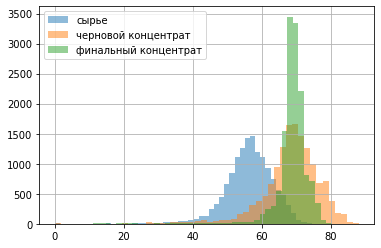

In [43]:
df_train['rougher.input.feed_sum'].hist(bins=50, label='сырье', alpha = 0.5)
df_train['rougher.output.concentrate_sum'].hist(bins=50, label='черновой концентрат', alpha = 0.5)
#df_train['primary_cleaner.output.concentrate_sum'].hist(bins=50, label='primary_cleaner', alpha = 0.5)
df_train['final.output.concentrate_sum'].hist(bins=50, label='финальный концентрат', alpha = 0.5)
plt.legend()
plt.show()

<font color='DarkBlue'> 
📌 Также присутствуют аномальные значения в левой части гистограммы, близкие к 0 и нужно рассмотреть гистрограмму с суммарными значениями включений от 1 <br> 
</font> 

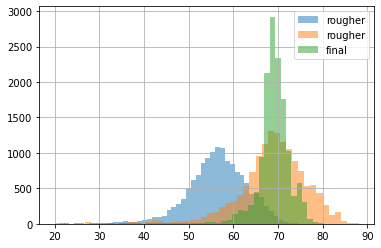

In [44]:
df_train['rougher.input.feed_sum'].hist(bins=50, label='rougher', alpha = 0.5, range=(20, df_train['rougher.input.feed_sum'].max()))
df_train['rougher.output.concentrate_sum'].hist(bins=50, label='rougher', alpha = 0.5, range=(20, df_train['rougher.output.concentrate_sum'].max()))
#df_train['primary_cleaner.output.concentrate_sum'].hist(bins=50, label='primary_cleaner', alpha = 0.5, range=(20, df_train['primary_cleaner.output.concentrate_sum'].max()))
df_train['final.output.concentrate_sum'].hist(bins=50, label='final', alpha = 0.5, range=(20, df_train['final.output.concentrate_sum'].max()))
plt.legend()
plt.show()

In [46]:
df_train = df_train[df_train['rougher.input.feed_sum'] > 20]
df_train = df_train[df_train['rougher.output.concentrate_sum'] > 20]
#df_train = df_train[df_train['primary_cleaner.output.concentrate_sum'] > 20]
df_train = df_train[df_train['final.output.concentrate_sum'] > 20]

<font color='DarkBlue'> 
📌 Записи с недостоверными данными удалены из используемых датасетов <br> 
</font> 

## Модель

<font color='DarkBlue'> 
📌 Необходимо определить параметр sMAPE. Желательно рассмотреть полученное значение для каждого этапа. Для этого предварительно нужно определить функцию для ее вычисления <br> 
</font> 

In [40]:
def sMAPE(target, predict):
    return (abs(target - predict) / ((abs(target) + abs(predict)) / 2)).sum() / len(predict) * 100

<font color='DarkBlue'> 
📌 Затем нужно обучить модели случайного леса и линейной регрессии и оценить их качество кросс-валидацией <br> 
📌 Для упрощения выполнения подобных манипуляций желательно написать функцию с алгоритмом по обучению моделей, выбору лучшей из них и определению ключевых метрик <br>
</font> 

In [41]:
def fit_model(i, kind):    
    df_features = df_train.drop(pd.DataFrame(df_train.columns)[~pd.DataFrame(df_train.columns)[0].isin(pd.Series(df_test.columns))][0], axis=1)
    df_features = df_features.drop('date', axis=1)
    df_target = df_train[i]
    df_features_train, df_features_valid, df_target_train, df_target_valid = train_test_split(df_features, df_target, test_size=0.25, random_state=12345)
    if kind == 'rf':
        print('\033[1m\033[43m {}'.format('----- Случайный лес -----'),'\033[0m')
        model = RandomForestRegressor(random_state=12345)
        grid = RandomizedSearchCV(model, {'n_estimators': range (11, 51, 10), 'max_depth': range (1, 11)}, cv=5, random_state=12345)
        grid.fit(df_features_train, df_target_train)
        print('Лучшая модель:', grid.best_estimator_)
        print('Параметры лучшей модели:', grid.best_params_)  
        print('Лучшая метрика R2:', grid.best_score_)   
        model = grid.best_estimator_
        scores = cross_val_score(model, df_features_train, df_target_train, cv=5) 
        final_score = scores.mean()
        print('Усредненное R2 на обучающей выборке', final_score) 
        model.fit(df_features_train, df_target_train)
        df_predicted_valid = model.predict(df_features_valid)
        print('R2 модели на обучающей выборке:', model.score(df_features_train, df_target_train))
        print('R2 модели на валидационной выборке:', model.score(df_features_valid, df_target_valid))
        print('RMSE модели на валидационной выборке:', mean_squared_error(df_target_valid, df_predicted_valid) ** 0.5)
        print('MAE модели на валидационной выборке:', mean_absolute_error(df_target_valid, df_predicted_valid))
        print('Среднее значение предсказания:', df_predicted_valid.mean())
        pd.Series(df_predicted_valid).hist(bins=20)
        plt.show()
    else:
        print('\033[1m\033[43m {}'.format('----- Линейная регрессия -----'),'\033[0m')
        numeric = df_features_train.select_dtypes(include=['float32']).columns
        scaler = StandardScaler()
        scaler.fit(df_features_train[numeric]) 
        df_features_train[numeric] = scaler.transform(df_features_train[numeric])
        df_features_valid[numeric] = scaler.transform(df_features_valid[numeric])
        model = LinearRegression()
        scores = cross_val_score(model, df_features_train, df_target_train, cv=5) 
        final_score = scores.mean()
        print('Усредненное R2 на обучающей выборке', final_score) 
        model.fit(df_features_train, df_target_train)
        df_predicted_valid = model.predict(df_features_valid)
        print('R2 модели на обучающей выборке:', model.score(df_features_train, df_target_train))
        print('R2 модели на валидационной выборке:', model.score(df_features_valid, df_target_valid))
        print('RMSE модели на валидационной выборке:', mean_squared_error(df_target_valid, df_predicted_valid) ** 0.5)
        print('MAE модели на валидационной выборке:', mean_absolute_error(df_target_valid, df_predicted_valid))
        print('Среднее значение предсказания:', df_predicted_valid.mean())
        pd.Series(df_predicted_valid).hist(bins=20)
        plt.show()
    return model

<font color='DarkBlue'> 
📌 Воспользовавшись данной функцией, необходимо обучить модели и вывести на экран их параметры <br> 
</font> 

 ----- Случайный лес ----- 
Лучшая модель: RandomForestRegressor(max_depth=9, n_estimators=11, random_state=12345)
Параметры лучшей модели: {'n_estimators': 11, 'max_depth': 9}
Лучшая метрика R2: 0.699225266119344
Усредненное R2 на обучающей выборке 0.699225266119344
R2 модели на обучающей выборке: 0.8300362004554644
R2 модели на валидационной выборке: 0.7279296924826153
RMSE модели на валидационной выборке: 4.158384295847403
MAE модели на валидационной выборке: 2.6489633762653955
Среднее значение предсказания: 84.73058022159317


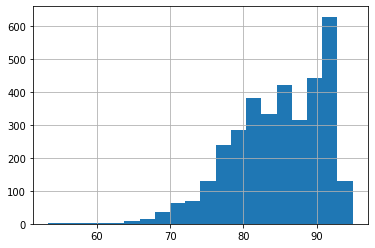

In [42]:
model_rougher_rf = fit_model('rougher.output.recovery','rf')

 ----- Линейная регрессия ----- 
Усредненное R2 на обучающей выборке 0.5198085812565185
R2 модели на обучающей выборке: 0.5277900050567493
R2 модели на валидационной выборке: 0.5658547365825048
RMSE модели на валидационной выборке: 5.25292959672453
MAE модели на валидационной выборке: 3.7499232
Среднее значение предсказания: 84.58163


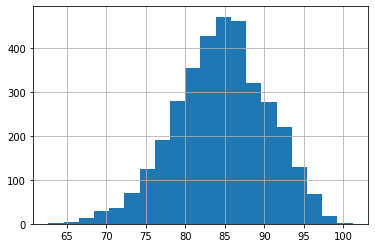

In [43]:
model_rougher_lr = fit_model('rougher.output.recovery','lr')

 ----- Случайный лес ----- 
Лучшая модель: RandomForestRegressor(max_depth=9, n_estimators=11, random_state=12345)
Параметры лучшей модели: {'n_estimators': 11, 'max_depth': 9}
Лучшая метрика R2: 0.47779440123892253
Усредненное R2 на обучающей выборке 0.47779440123892253
R2 модели на обучающей выборке: 0.6759172113096501
R2 модели на валидационной выборке: 0.5290781782930429
RMSE модели на валидационной выборке: 6.3295560754542874
MAE модели на валидационной выборке: 4.248705530579565
Среднее значение предсказания: 66.75827917323944


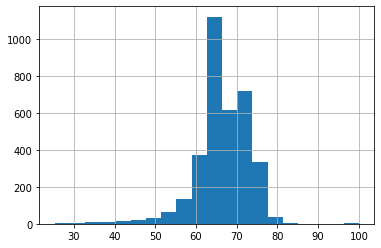

In [44]:
model_final_rf = fit_model('final.output.recovery','rf')

 ----- Линейная регрессия ----- 
Усредненное R2 на обучающей выборке 0.335787545396698
R2 модели на обучающей выборке: 0.3482816837103122
R2 модели на валидационной выборке: 0.35746877228150997
RMSE модели на валидационной выборке: 7.393430020267968
MAE модели на валидационной выборке: 5.0601974
Среднее значение предсказания: 66.80211


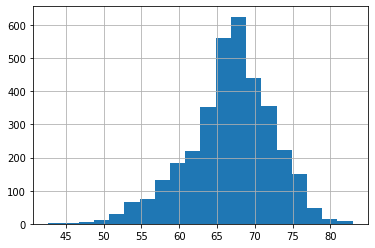

In [45]:
model_final_lr = fit_model('final.output.recovery','lr')

<font color='DarkBlue'> 
📌 Лучшими моделями являются обученные с использованием алгоритма случайного леса, их метрики качества выше, а отклонение меньше. Также на гистограмме значения менее распределены, чем у другой модели <br> 
📌 Теперь требуется проверить лучшие модели на тестовой выборке <br>
</font> 

In [46]:
print('R2 модели этапа rougher на тестовой выборке:', model_rougher_rf.score(df_test.drop('date', axis=1), df_full[~df_full['date'].isin(df_train['date'])].reset_index(drop=True)['rougher.output.recovery']))
df_predicted_test_rougher = model_rougher_rf.predict(df_test.drop('date', axis=1))
print('R2 модели этапа final на тестовой выборке:', model_final_rf.score(df_test.drop('date', axis=1), df_full[~df_full['date'].isin(df_train['date'])].reset_index(drop=True)['final.output.recovery']))
df_predicted_test_final = model_final_rf.predict(df_test.drop('date', axis=1))

R2 модели этапа rougher на тестовой выборке: 0.23144067303062443
R2 модели этапа final на тестовой выборке: -0.1710635891088692


<font color='DarkBlue'> 
📌 Можно сравнить распределения исходной выборки и предсказаний с нулевой гипотезой об их сходимости <br> 
</font> 

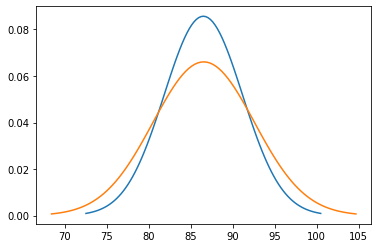

p-значение: 0.6624599399434061
Не получилось отвергнуть нулевую гипотезу


In [47]:
plt.plot(np.linspace(df_predicted_test_rougher.mean() - 3 * df_predicted_test_rougher.std(), df_predicted_test_rougher.mean() + 3 * df_predicted_test_rougher.std(), num=101),st.norm.pdf(np.linspace(df_predicted_test_rougher.mean() - 3 * df_predicted_test_rougher.std(), df_predicted_test_rougher.mean() + 3 * df_predicted_test_rougher.std(), num=101), df_predicted_test_rougher.mean(), df_predicted_test_rougher.std()))
plt.plot(np.linspace(df_full[~df_full['date'].isin(df_train['date'])].reset_index(drop=True)['rougher.output.recovery'].mean() - 3 * df_full[~df_full['date'].isin(df_train['date'])].reset_index(drop=True)['rougher.output.recovery'].std(), df_full[~df_full['date'].isin(df_train['date'])].reset_index(drop=True)['rougher.output.recovery'].mean() + 3 * df_full[~df_full['date'].isin(df_train['date'])].reset_index(drop=True)['rougher.output.recovery'].std(), num=101),st.norm.pdf(np.linspace(df_full[~df_full['date'].isin(df_train['date'])].reset_index(drop=True)['rougher.output.recovery'].mean() - 3 * df_full[~df_full['date'].isin(df_train['date'])].reset_index(drop=True)['rougher.output.recovery'].std(), df_full[~df_full['date'].isin(df_train['date'])].reset_index(drop=True)['rougher.output.recovery'].mean() + 3 * df_full[~df_full['date'].isin(df_train['date'])].reset_index(drop=True)['rougher.output.recovery'].std(), num=101), df_full[~df_full['date'].isin(df_train['date'])].reset_index(drop=True)['rougher.output.recovery'].mean(), df_full[~df_full['date'].isin(df_train['date'])].reset_index(drop=True)['rougher.output.recovery'].std()))
plt.show()
alpha = .01 # критический уровень статистической значимости
# если p-value окажется меньше него - можно отвергнуть гипотезу
results = st.ttest_ind(df_predicted_test_rougher, df_full[~df_full['date'].isin(df_train['date'])].reset_index(drop=True)['rougher.output.recovery'], equal_var = False)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергается нулевая гипотеза')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

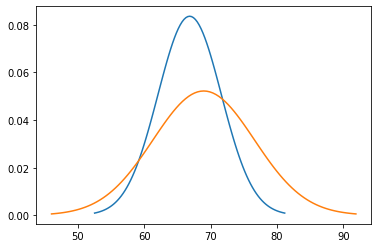

p-значение: 1.419873541425515e-64
Отвергается нулевая гипотеза


In [48]:
plt.plot(np.linspace(df_predicted_test_final.mean() - 3 * df_predicted_test_final.std(), df_predicted_test_final.mean() + 3 * df_predicted_test_final.std(), num=101),st.norm.pdf(np.linspace(df_predicted_test_final.mean() - 3 * df_predicted_test_final.std(), df_predicted_test_final.mean() + 3 * df_predicted_test_final.std(), num=101), df_predicted_test_final.mean(), df_predicted_test_final.std()))
plt.plot(np.linspace(df_full[~df_full['date'].isin(df_train['date'])].reset_index(drop=True)['final.output.recovery'].mean() - 3 * df_full[~df_full['date'].isin(df_train['date'])].reset_index(drop=True)['final.output.recovery'].std(), df_full[~df_full['date'].isin(df_train['date'])].reset_index(drop=True)['final.output.recovery'].mean() + 3 * df_full[~df_full['date'].isin(df_train['date'])].reset_index(drop=True)['final.output.recovery'].std(), num=101),st.norm.pdf(np.linspace(df_full[~df_full['date'].isin(df_train['date'])].reset_index(drop=True)['final.output.recovery'].mean() - 3 * df_full[~df_full['date'].isin(df_train['date'])].reset_index(drop=True)['final.output.recovery'].std(), df_full[~df_full['date'].isin(df_train['date'])].reset_index(drop=True)['final.output.recovery'].mean() + 3 * df_full[~df_full['date'].isin(df_train['date'])].reset_index(drop=True)['final.output.recovery'].std(), num=101), df_full[~df_full['date'].isin(df_train['date'])].reset_index(drop=True)['final.output.recovery'].mean(), df_full[~df_full['date'].isin(df_train['date'])].reset_index(drop=True)['final.output.recovery'].std()))
plt.show()
alpha = .01 # критический уровень статистической значимости
# если p-value окажется меньше него - можно отвергнуть гипотезу
results = st.ttest_ind(df_predicted_test_final, df_full[~df_full['date'].isin(df_train['date'])].reset_index(drop=True)['final.output.recovery'], equal_var = False)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергается нулевая гипотеза')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

<font color='DarkBlue'> 
📌 Точность моделей небольшая, в частности, касательно финального этапа. Скорее всего, значения признаков в тестовой выборке значительно отличаются от имеющихся в обучающей <br> 
📌 Теперь требуется определить значение sMAPE в процентах для отдельных этапов и итоговое <br>
</font> 

In [49]:
sMAPE_rougher = sMAPE(df_full[df_full['date'].isin(df_test['date'])]['rougher.output.recovery'], df_predicted_test_rougher)
print('sMAPE_rougher:', sMAPE_rougher)
sMAPE_final = sMAPE(df_full[df_full['date'].isin(df_test['date'])]['final.output.recovery'], df_predicted_test_final)
print('sMAPE_final:', sMAPE_final)
sMAPE_sum = 0.25 * sMAPE_rougher + 0.75 * sMAPE_final
print('sMAPE:', sMAPE_sum)

sMAPE_rougher: 4.37319683715351
sMAPE_final: 8.985077282407332
sMAPE: 7.8321071710938766


<font color='DarkBlue'> 
📌 Исходя из указанной информации определяется, что коэффициент демонстрирует смещение прогноза относительно фактических значений на 7-8%. Такой процент составляет ошибка от самого прогноза, что является достаточно хорошим показателем для предсказаний модели <br> 
    
📌 На основании произведенных исследований можно сформировать следующие выводы:   
- предоставленные данные качества лучше среднего, содержится небольшое количество пропусков и аномалий, для более удобного анализа необходимо преобразование типов данных в форматы, занимающие меньший объем памяти, и удаление неинформативного поля 'date'
- в исходных данных эффективность обогащения рассчитана правильно
- вцелом концентрация примесей планомерно уменьшается на каждом последующем этапе, а золота увеличивается
- распределения размеров гранул сырья на обучающей и тестовой выборках не совпадают, следовательно оценка используемой модели неверна   
- определено, что наилучшим алгоритмом обучения модели для определения расчета эффективности по исходным данным будет являться 'Случайный лес' <br> 
- составлена функция для вычисления sMAPE и определен данный параметр